In [14]:
import gpt as g
import qlat as q
import numpy as np
from scipy.optimize import curve_fit
from scipy.linalg import inv
from scipy.linalg import eigh
from scipy.stats import f as fdist
import matplotlib.pyplot as plt

SharedMemoryMpi:  World communicator of size 1
SharedMemoryMpi:  Node  communicator of size 1
SharedMemoryMpi: SharedMemoryAllocate 1073741824 MMAP anonymous implementation 

__|__|__|__|__|__|__|__|__|__|__|__|__|__|__
__|__|__|__|__|__|__|__|__|__|__|__|__|__|__
__|_ |  |  |  |  |  |  |  |  |  |  |  | _|__
__|_                                    _|__
__|_   GGGG    RRRR    III    DDDD      _|__
__|_  G        R   R    I     D   D     _|__
__|_  G        R   R    I     D    D    _|__
__|_  G  GG    RRRR     I     D    D    _|__
__|_  G   G    R  R     I     D   D     _|__
__|_   GGGG    R   R   III    DDDD      _|__
__|_                                    _|__
__|__|__|__|__|__|__|__|__|__|__|__|__|__|__
__|__|__|__|__|__|__|__|__|__|__|__|__|__|__
  |  |  |  |  |  |  |  |  |  |  |  |  |  |  


Copyright (C) 2015 Peter Boyle, Azusa Yamaguchi, Guido Cossu, Antonin Portelli and other authors

This program is free software; you can redistribute it and/or modify
it under the terms of the 

## Reference information

### Correlation functions

Here I will detail some information regarding the two pion correlation functions, referring to the 2023 two pion scattering paper, ensuring I understand what is going on. 

single pion operators are defined as 
$$\pi^a(t,\vec{p}) = \sum_{\vec{x},\vec{y}}e^{-i(\vec{p_1}\cdot\vec{x} + \vec{p_2}\cdot\vec{y})}f_r(||\vec{x} - \vec{y}||) \ \overline{\psi}(t,\vec{x})i\gamma_5 F^a \psi(t,\vec{y}) $$ where $F^+ = \frac{1}{2}(\sigma_1 + i\sigma_2)$, $F^- = \frac{1}{2}(-\sigma_1 + i\sigma_2)$, $F^0 = \frac{1}{\sqrt{2}}\sigma_3$, and the $\psi$ objects are the isospin doublets.

We construct two pion operators as products of single pion operators, projecting them to definite isospin via constants $c^{I,I_z}_{ab}$; 
$$
\tilde{O}^{I,I_z}_{\pi\pi}(t_1,t_2, \vec{P}, \vec{p}/2) = \sum_{a,b}c^{I,I_z}_{a,b}\pi^a(t_1, (\vec{P} + \vec{p})/2) \ \pi^{b}(t_2,(\vec{P} - \vec{p}/2))
$$
Note the two times that the two pion operator depends on, we can look at operators composed of two bilinear operators located at different time slices, and we define 
$\Delta = |t_2 - t_1|$. 

Concentrating on the rest frame, $\vec{P} = 0$, and the s-wave operators and states, we can construct a four operator basis for $I=2$ corresponding to each two pion operator with
$(I,I_z) = (2,0)$ for different lattice momenta configurations, 
$$
O^{2,0}(t) = O^{2,0}_{\pi\pi}(t,t+\Delta,\vec{0},(p_x,p_y,p_z) \times 2\pi/L)
$$
for momentum configurations (0,0,0), (0,0,1), (0,1,1) and (1,1,1). 

For use in the GEVP, we define a matrix correlation function is defined using this basis of operators, 
$$
C_{ij}^{I,I_z}(t) = \left\langle O^{I,I_z}_i(t)O^{I,I_z}_j(-\Delta_j)^{\dagger} \right\rangle
$$


At this point various subtractions can be made; in the $I=0$ case, the ground state is the vacuum, so a vacuum subtraction is standard. For both isospin channels, thermal or "around the world" effects can cause contamination, so these effects are subtracted. Since the lattice has periodic boundary conditions and has a finite time extent, these ATW effects take place when one of the source pions propagates forward in time while the other goes backward through the boundary to reach the sink. The leading ATW effects are time independent when the rest frame is used, meaning that we can remove the leading ATW effect via a matrix subtraction parameterized by $\delta_t$, 
$$
C_{ij,sub}^{I,I_z}(t) = C^{I,I_z}_{ij}(t) - C_{ij}^{I,I_z}(t + \delta_t)
$$

### GEVP

To extract operators or energies that couple most strongly to a certain energy state of the system, a generalized eigenvalue problem must be solved. This diagonalizes the correlator matrix, allowing us to calculate energies of a complicated correlation function such as the two pion two point function. We use the basis of operators given above, specifically four opperators in the $I=2$ case, and we include the $\sigma$ like operator in the $I=0$ case, expanding the basis to five operators. The GEVP is formulated as 
$$ 
C(t)V_n(t,t_0) = \lambda(t,t_0)C(t_0)V_n(t,t_0)
$$
where we pick our reference time $t_0$ such that the difference $t-t_0 = \Delta_t$ is a constant. We may construct the operator basis as large as we want, based on the states or operators we want to extract - the preliminary test in this notebook is a 2x2 GEVP in the $I=2$ channel, extracting only the ground state and first excited state two pion energy. Following this is a GEVP with the full 4x4 correlator matrix for $I=2$, testing how a standard GEVP does with the subset of sinks and sparsened propagators. 

Effective energies are extracted through the eigenvalues, 
$$
E^{\text{eff}}_n(t,t_0) = \ln\lambda_n(t,t_0) - \ln\lambda_n(t+1,t_0)
$$

and new operators that couple strongly to the $n$-th state but not the other states can be constructed through a basis change involving the eigenvectors
$$
\tilde{O}_n = \sum_iV_{n,i}O_i
$$

In a two pion two point function, there are contributions from so-called 'around the world' effects, where one of the source pions propagates forwards in time, reaching one of the sinks, and the other source pion propagates backward through the boundary to reach the sinks. This is solely due to a finite volume and periodic boundary conditions. The leading ATW contribution goes to zero as the time extent of the lattice goes to infinity, and while in the rest frame the leading ATW effect is time-independent. This leading contribution is dealt with by a matrix subtraction, 
$$
C^{I,I_z}_{ij,sub}(t) = C^{I,I_z}_{ij}(t) - C^{I,I_z}_{ij}(t+\delta_t)
$$
using $\delta_t$ as an arbitrary time shift. This subtraction removes constant contributions to the correlation function, which does include the vacuum subtraction in the $I=0$ channel. 

Next, ordering of the eigenvalues and vectors becomes arbitrary at large time separations due to the large statistical error of the correlation functions. This may lead to increased statistical errors in the two pion energies and GEVP eigenvectors. The method to fix this relies on a recursice calculation method ar large times. First, for short time separations, the correlators are well resolved and there is no ordering ambiguity. For large time separations, excited state contamination is small, we can use the rebased operators using the GEVP eigenvectors from the timeslice previous. This is done by constructing an $N \times N$ matrix, 
$$
T(t_0 - 1) = (V_1(t_0-1)V_2(t_0-1)...V_N(t_0-1))
$$
with these, approximately diagonal correlator matrices are constructed,
$$
C'(t,t_0-1) = T(t_0 - 1)^{\dagger}C(t)T(t_0-1), 
$$
$$
C'(t_0,t_0-1) = T(t_0-1)^{\dagger}C(t_0)T(t_0-1)
$$

We then do the GEVP using these newly constructed correlator matrices, using 
$$
V_n(t_0) = T(t_0 - 1)V'_n(t_0)
$$
to convert back the the orginial basis of GEVP eigenvectors. 

The second improvement comes from the re-based GEVP or RGEVP, which reduces the size of the GEVP basis of operators one or multiple times at a given $t_0$. We start with some GEVP size $N_{t_0}$, and at each time slice we define a GEVP size such that $N_1 \ge N_2 \ge ...$. One starts by solving the $N_1 \times N_1$ GEVP on the beginning time slice where $t_0 = 1$, ensuring the descending order of eigenvectors as detailed above. For the following timeslices, assume we have obtained the GEVP eigenvectors from the timeslice previous, also assuming that $N_1 > N_2$, we want to calculate rebased correlator matrices using the same construction as above, using the GEVP eigenvectors from the timeslice previous. This then creates $N_1 \times N_{t_0}$ rebasing matrices, which will then reduce the correlator matrix to a $N_2 \times N_2$ GEVP once the basis change has been completed. We may choose the timeslice where the basis reduction happens, and it is possible to do it multiple times, corresponding to a multi-step RGEVP. 

The 2023 pion scattering paper uses a rebasing matrix to go from a 4x4 to a 3x3 GEVP at $t_0 = 4$. 

## Pre-Analysis

### Analysis functions

In [15]:
def covariance(data, shrinkage=0.1):
    
    nconf,tsize=data.shape
    covmat=np.zeros((tsize,tsize))
    avg = np.average(data,axis=0)
    for n in range(nconf):
        covmat+=np.outer(data[n]-avg,data[n]-avg)
    covmat*=1/nconf
    covmat *= nconf-1

    #shrink toward diagonal
    diag_cov = np.diag(np.diag(covmat))
    covmat_shrunk = (1-shrinkage) * covmat + shrinkage * diag_cov
    
    return avg,covmat_shrunk
#write a model function for the ground state, it should be simply an exponential fit form just like a single pion.
#use this const plus exp or a multi exponential for the excited states

#ground state fit form
def const_fit(t,*p):
    
    return p[0]

def pure_exp(t,*p):
    return p[0]*np.exp(-t*p[1])

def gs_linear(t,*p):
    return -np.log(p[1]) + p[0]*t

#p are the fitting parameters, of which we should have either 2(ground state) or 4(excited states)
def const_plus_exp(t,*p):
    
    #E + Ae^{-t*DeltaE)
    return p[0]+p[1]*np.exp(-t*p[2])
    
#calcualtes the variance of a multi-paramter function, where c is a square matrix with dimensions of the same size as the number of parameters. 
def err_const_plus_exp(t,p,c):
    
    fact = np.exp(-t*p[2])
    errsq  =   c[0][0]
    errsq +=   c[1][1]*(fact)**2
    errsq +=   c[2][2]*((-t)*p[1]*fact)**2
    errsq += 2*c[0][1]*fact
    errsq += 2*c[0][2]*(-t)*p[1]*fact
    errsq += 2*c[1][2]*(-t)*p[1]*fact**2
    
    return np.sqrt(errsq)

In [16]:
def gs_fit(Ens, maxOp,tmin,tmax):
    #ground state fit
    npar = 2
    ncf = Ens.ncf
    fitpars_gs=np.zeros((ncf, npar))
    fitcov_gs=np.zeros((ncf, npar, npar))
    
    csq = np.zeros(ncf)
    guess=([0.25,1.0])
    
    l=0
    
    avg,cov=covariance(-np.log(Ens.e[:,tmin:tmax,l]),shrinkage=0.1)
    dof=tmax-tmin-npar
    t=np.arange(tmin,tmax)
    for jk in range(ncf):
        val = -np.log(Ens.e[jk,tmin:tmax,l])
        popt,pcov=curve_fit(gs_pure_exp,t,val,sigma=cov,p0=guess,absolute_sigma=True)
    
        fitpars_gs[jk] = popt
        fitcov_gs[jk] = pcov
        theory = gs_pure_exp(t,*popt)
        r=avg-theory
        csq[jk] = r.T @ inv(cov) @ r
    cs = jack(csq)
    F = fdist(dof,ncf-dof)
    p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
    print("n, chisq, dof=",0,cs,dof)
    print('p-value=', p_value)
    print("----------------------------------------")

    return fitpars_gs, fitcov_gs

In [17]:
def ex_fit(ens_ncf, ens_energy, maxOp, tmin, tmax):
    #ens_energy are the energies here, but in the same shape as the GEVP evals, (ncf, nt, nOp)
    print(ens_energy.shape)
    minOp = 0
    npar = 1
    ncf = ens_ncf
    fitpars_ex=np.zeros((maxOp,ncf,npar))
    fitcov_ex=np.zeros((maxOp,ncf,npar,npar))
    csq=np.zeros((maxOp,ncf))
    guess=([0.5])
    for l in range(0,maxOp):
        avg,cov=covariance(ens_energy[:,tmin:tmax,l],shrinkage=0.2) #shrinkage allows for regularization of the covariance matrix if it isn't positive definite
        dof=tmax-tmin-npar
        t=np.arange(tmin,tmax)
        for jk in range(ncf):
            val = ens_energy[jk,tmin:tmax,l]
            popt,pcov=curve_fit(const_fit,t,val,sigma=cov, 
                            p0=guess, absolute_sigma=True,maxfev=2000)
            
            fitpars_ex[l][jk] = popt
            fitcov_ex[l][jk] = pcov
            theory = const_fit(t, *popt)
            r = avg - theory
            csq[l][jk] = r.T @ inv(cov) @ r
            
        cs=jack(csq[l])
        F = fdist(dof,ncf-dof)
        p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
        print('n, chi square, dof=',l,cs,dof)
        print('p-value=',p_value)
        print("----------------------------------------")

    return fitpars_ex, fitcov_ex

def ex_fit_ln(ens_ncf,ens_evals, maxOp, tmin, tmax):
    minOp=0
    npar = 1 #each excited state has the energy, amplitude, and deltaE params
    ncf = ens_ncf
    fitpars_ex=np.zeros((maxOp,ncf, npar))
    fitcov_ex=np.zeros((maxOp,ncf,npar,npar))
    csq=np.zeros((maxOp,ncf))
    guess=([0.5])

    for l in range(0,maxOp):
        l = int(l)
        #covariance matrix to calculate timeslice correlations
        avg,cov=covariance(-np.log(ens_evals[:,tmin:tmax,l]),shrinkage=0.2) #shrinkage allows for regularization of the covariance matrix if it isn't positive definite
        dof=tmax-tmin-npar
        t=np.arange(tmin,tmax)

        #fit each jackknife block using the same correlation matrix
        for jk in range(ncf):
            val = -np.log(ens_evals[jk,tmin:tmax,l])
            popt,pcov=curve_fit(const_fit,t,val,sigma=cov, 
                            p0=guess, absolute_sigma=True,maxfev=5000)
            
            fitpars_ex[l][jk] = popt
            fitcov_ex[l][jk] = pcov
            theory = const_fit(t, *popt)
            #r = avg - theory
            r = val - theory
            csq[l][jk] = r.T @ inv(cov) @ r
        cs=jack(csq[l])
        F = fdist(dof,ncf-dof)
        p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
        print('n, chi square, dof=',l,cs,dof)
        print('p-value=',p_value)
        print("----------------------------------------")

    return fitpars_ex, fitcov_ex

In [41]:
#constructs Ncf jackknife blocks
def jackblocks(data,omit,prt=0):
    #loop over timeslices
    #assuming shape (Ncf,NT)
    jacks = np.zeros(data.shape,dtype=np.complex128)
    nconf=data.shape[0]
    nt=data.shape[1]
    norm=1.0/(nconf-1-len(omit))
    if(prt):print('omitting '+str(len(omit))+' of '+str(nconf)+' configs')
    for j in range(0,nt):
        #
        # sum over configs
        #
        s=0.0
        for i in range(0,nconf):
            if i not in omit:
                s = s + data[i,j]
        #
        # contruct jacks for time slice j
        #
        n=0
        for i in range(0,nconf):
            if i not in omit:
                jacks[n,j] = s-data[i,j]
                jacks[n,j] *= norm
                n=n+1

    return jacks

#constructs Ncf jackknife blocks
def jackblocks_expr(data,omit,prt=0):
    #loop over timeslices
    #assuming shape (Ncf,NT)
    jacks = np.zeros(data.shape,dtype=np.complex128)
    nconf=data.shape[0]
    nexp = data.shape[1]
    nt=data.shape[2]
    norm=1.0/(nconf-1-len(omit))
    if(prt):print('omitting '+str(len(omit))+' of '+str(nconf)+' configs')
    for j in range(0,nt):
        #
        # sum over configs
        #
        s=np.zeros(nexp,dtype=np.complex128)
        for i in range(0,nconf):
            if i not in omit:
                s[:] = s[:] + data[i,:,j]
        #
        # contruct jacks for time slice j
        #
        n=0
        for i in range(0,nconf):
            if i not in omit:
                jacks[n,:,j] = s[:]-data[i,:,j]
                jacks[n,:,j] *= norm
                n=n+1

    return jacks

def jack(vec):
    n=vec.shape[0]
    avg=0.0
    # compute average
    for i in range(0,n):
        avg+=vec[i]
    avg = avg/n
    # compute error
    err=0.0
    for i in range(0,n):
        err+=(vec[i]-avg)*(vec[i]-avg)
    err *= (n-1)/n
    err = np.sqrt(err)
    #print(f'{n} blocks, avg+-err= {avg:.4e} +- {err:.4e}')
    return avg, err

In [19]:
#effectively a struct with various important variables for the GEVP inside. 
class Ensemble_jks: 
    def __init__(self,jks):
        self.nOp = jks.shape[0] #operator list
        self.jks = jks #gevp correlator single jk blocks
        self.jks_ct_all = 0
        self.double_jks=0
        self.vec=0 #GEVP eigenvectors
        self.e=0
        self.e_o=0
        self.vec_o=0 #ordered GEVP eigenvectors
        self.ncf= jks.shape[-2]
        self.nt= jks.shape[-1]
        pass

In [20]:
#function that does the GEVP calculation. input 1 is the struct holding the data, and will serve as the output, as we set the e and vec members 
#through this function. min and max Op are integers defining the number of operators in the GEVP, and tmin and tmax define the temporal range. 
#the struct requires at minimum an "e", "vec" and "jks" member.  
def GEVP(ens_params,minOp,maxOp,tmin,tmax):
    ncf = ens_params.ncf
    nt = ens_params.nt
    ens_params.e = np.zeros((ncf, nt, maxOp-minOp))
    ens_params.vec=np.zeros((ncf, nt, maxOp-minOp, maxOp-minOp))
    
    for cf in range(ncf):
        for t in range(tmin,tmax):
            a = ens_params.jks[minOp:maxOp, minOp:maxOp, cf, t] #C(t) for some jackknife block
            b = ens_params.jks[minOp:maxOp, minOp:maxOp, cf, t-1] #C(t_0) for some jackknife block
            #np.linalg.cholesky(b) error here if b is not positive definite
            a = 0.5*(a+np.conjugate(np.transpose(a))) #ensure hermiticity
            b = 0.5*(b+np.conjugate(np.transpose(b)))

            ev, evec = eigh(a,b,type=1)

            #sort the eigenvalues into descending order
            ev_desc = ev[::-1]
            ens_params.e[cf,t] = ev_desc
            #sort the columns of the eigenvectors to match
            vec_desc = evec[:,::-1]
            ens_params.vec[cf,t] = vec_desc
            #ens_params.e[cf,t],ens_params.vec[cf,t]=eigh(a,b,type=1) # Type 1 => a @ v = w @ b @ v

#GEVP function that ensures the proper order of eigenvalues via a recursive technique. nt_ordered is the number of early timeslices that 
#look like there is no ordering ambiguity, meaning we do the GEVP normally for those few timeslices. 
def GEVP_order(ens_params, minOp, maxOp, tmin, tmax, nt_ordered):
    ncf = ens_params.ncf
    nt = ens_params.nt
    ens_params.e_o = np.zeros((ncf, nt, maxOp-minOp))
    ens_params.vec_o=np.zeros((ncf,nt,maxOp-minOp,maxOp-minOp))

    for cf in range(ncf):
        #solve the GEVP for the early times where ordering isn't an issue
        for t in range(tmin, tmin+nt_ordered):
            a = ens_params.jks[minOp:maxOp, minOp:maxOp, cf, t]
            b = ens_params.jks[minOp:maxOp, minOp:maxOp, cf, t-1]
            
            a = 0.5*(a+np.conjugate(np.transpose(a))) #ensure hermiticity
            b = 0.5*(b+np.conjugate(np.transpose(b)))

            ev, evec = eigh(a,b,type=1)

            #sort the eigenvalues into descending order
            ev_desc = ev[::-1]
            ens_params.e_o[cf,t] = ev_desc
            #sort the columns of the eigenvectors to match
            vec_desc = evec[:,::-1]
            ens_params.vec_o[cf,t] = vec_desc
            #ens_params.e[cf,t],ens_params.vec[cf,t]=eigh(a,b,type=1) # Type 1 => a @ v = w @ b @ v

        #now that we have the eigenvectors and values for nt_ordered numbers of timeslices, we find the evs and evecs for the next timeslice
        #by constructing a new correlator matrix using what we have 
        for t in range(tmin + nt_ordered, tmax):
            #grab C(t) and C(t_0)
            a = ens_params.jks[minOp:maxOp, minOp:maxOp, cf, t]
            b = ens_params.jks[minOp:maxOp, minOp:maxOp, cf, t-1] 
            a = 0.5*(a+np.conjugate(np.transpose(a))) #ensure hermiticity
            b = 0.5*(b+np.conjugate(np.transpose(b)))

            # we then construct new correlator matrix C'(t) = T(t_0 - 1)^dag * C(t) * T(t_0 - 1) (same for t_0) 
            #where T(t_0 - 1) is a matrx of the eigenvalues a timeslice earlier

            T = ens_params.vec_o[cf,t-2] #t_0 - 1 = t - 2 since Delta_t = 1. This assumes a shape, this could be wrong
            T_dag = np.conjugate(T).T

            #print(T)
            
            C_p_t = T_dag @ a @ T
            C_p_t0 = T_dag @ b @ T

            
            #Now we GEVP thse new matrices
            ev_p,evec_p = eigh(C_p_t, C_p_t0, type=1)

            sort_idx = np.argsort(ev_p)[::-1] #sorting the eigenvalues in descending order by their index. 
            ev_desc = ev_p[sort_idx] #applying the sorted indices to the eval and evec arrays
            evec_desc = evec_p[:,sort_idx]
            
            ##re-order the eigenvalues and vectors?
            #ev_desc = ev[::-1]
            #evec_desc = evec[:,::-1]

            evec_ordered = np.zeros_like(evec_desc)

            #then we must change back to the original basis, Vn(t0 - 1) = T(t0 - 1)Vn'(t0 - 1)
            #the eigenvalues don't change? we just change back preserving the order we found? 
            for n in range(maxOp):
                evec_ordered[:,n] = T @ evec_desc[:,n]

            ens_params.e_o[cf,t] = ev_desc
            ens_params.vec_o[cf,t] = evec_ordered
    

In [21]:
#function that does the ATW correlator subtraction for a given element of the correlator matrix. inputs are 2d correlator data and the 
#arbitrary subtraction timeslice. corr comes in with shape (nOp,nOp, ncf, nt)
def atw_subtract(corr,delta_t):
    nOp = corr.shape[0]
    ncf = corr.shape[2]
    nt = corr.shape[3]
    corr_sub = np.zeros((nOp,nOp,ncf,nt-delta_t),dtype=np.complex128)


    
    for t in range(nt-delta_t):
        corr_sub[:,:,:,t] = (corr[:,:,:,t] - corr[:,:,:,t+delta_t])

    #test the subtraction worked properly
    #print(f"unsubtracted pions at rest mean value at t=5")
    #print(np.mean(corr[1,1,:,5]))
    #print(np.std(corr[1,1,:,5]))

    #print(f"delta={delta_t} at rest mean at t=5")
    #print(np.mean(corr_sub[1,1,:,5]))
    #print(np.std(corr_sub[1,1,:,5]))
    
    return corr_sub

In [22]:
def ATW_subtract_data(raw_corr, delta_t_min, delta_t_max):
    corr_sub_list = []
    corr_sub_jk = []
    Ens_list = []
    maxOp = raw_corr.shape[0]

    delta_t_range = np.arange(delta_t_min, delta_t_max)

    for delta_t in delta_t_range:
        corr_sub_list.append(atw_subtract(raw_corr,delta_t))

    for corr in corr_sub_list:
        corr_jk = np.zeros_like(corr)
        for i in range(maxOp):
            for j in range(maxOp):
                corr_jk[i,j,:,:] = jackblocks(corr[i,j,:,:], omit = [])

        corr_sub_jk.append(corr_jk)
        Ens_list.append(Ensemble_jks())

    for i in range(len(corr_sub_list)):
        Ens_list[i].jks = corr_sub_jk[i]
        Ens_list[i].ncf = Ens_list[i].jks.shape[2]
        Ens_list[i].nt = Ens_list[i].jks.shape[3]

    #print(len(corr_sub_jk))
    #print(corr_sub_jk[1].shape)

    return Ens_list

### Load in data

In [23]:
#load in data
dst_list = []
prefix = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-Delta01/"

for cf in range(1112, 1493,10):
    dst_list.append(prefix+f"traj-{cf}/pipi_corr_psnk_psrc.lat")
    
#for cf in range(1505, 1596,10):
#    dst_list.append(prefix+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

In [24]:
dst_list_2 = []
prefix2 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-Delta23/"

for cf in range(1112, 1493, 10):
    dst_list_2.append(prefix2+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

In [25]:
dst_list_3 = []
prefix3 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-D5d25/"

for cf in range(1102, 1263, 10):
    dst_list_3.append(prefix3+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1282, 1493, 10):
    dst_list_3.append(prefix3+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

#for cf in range(1102, 1493,10):
#    dst_list_3.append(prefix3+f"traj-{cf}/pipi_corr_psnk_psrc.lat")
    
for cf in range(1505, 1636,10):
    dst_list_3.append(prefix3+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1705, 2026,10):
    dst_list_3.append(prefix3+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

dst_list_3.append(prefix3+f"traj-2045/pipi_corr_psnk_psrc.lat")
dst_list_3.append(prefix3+f"traj-2055/pipi_corr_psnk_psrc.lat")
dst_list_3.append(prefix3+f"traj-2065/pipi_corr_psnk_psrc.lat")
dst_list_3.append(prefix3+f"traj-2085/pipi_corr_psnk_psrc.lat")
dst_list_3.append(prefix3+f"traj-2095/pipi_corr_psnk_psrc.lat")

In [26]:
dst_list_4 = []
prefix4 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-D4d16/"

for cf in range(1102, 1263, 10):
    dst_list_4.append(prefix4+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1282, 1493, 10):
    dst_list_4.append(prefix4+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

In [27]:
dst_list_5 = []
prefix5 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-d25/"

#for cf in range(1102, 1493,10):
#    dst_list_5.append(prefix5+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1102, 1263, 10):
    dst_list_5.append(prefix5+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1282, 1493, 10):
    dst_list_5.append(prefix5+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1505, 1636,10):
    dst_list_5.append(prefix5+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

for cf in range(1705, 2026,10):
    dst_list_5.append(prefix5+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

dst_list_5.append(prefix5+f"traj-2045/pipi_corr_psnk_psrc.lat")
dst_list_5.append(prefix5+f"traj-2055/pipi_corr_psnk_psrc.lat")
dst_list_5.append(prefix5+f"traj-2065/pipi_corr_psnk_psrc.lat")
dst_list_5.append(prefix5+f"traj-2085/pipi_corr_psnk_psrc.lat")
dst_list_5.append(prefix5+f"traj-2095/pipi_corr_psnk_psrc.lat")

In [28]:
dst_list_6 = []
prefix6 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-d100/"

for cf in range(1112, 1383, 10):
    dst_list_6.append(prefix5+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

In [29]:
dst_list_7 = []
prefix7 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-d0/"

for cf in range(1102, 1373, 10):
    dst_list_7.append(prefix6+f"traj-{cf}/pipi_corr_psnk_psrc.lat")

In [30]:
dst1102 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract-pipi-D5d25/traj-1282/pipi_corr_psnk_psrc.lat"
ld1102 = q.load_lat_data(dst1102)
q.display_info(ld1102.info())

[['expr_name', 17, ['< 1 >  exprs[0]', '< wf_snk(0) * wf_src(0) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[1]', '< wf_snk(1) * wf_src(0) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[2]', '< wf_snk(2) * wf_src(0) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[3]', '< wf_snk(3) * wf_src(0) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[4]', '< wf_snk(0) * wf_src(1) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[5]', '< wf_snk(1) * wf_src(1) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[6]', '< wf_snk(2) * wf_src(1) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[7]', '< wf_snk(3) * wf_src(1) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[8]', '< wf_snk(0) * wf_src(2) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[9]', '< wf_snk(1) * wf_src(2) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[10]', '< wf_snk(2) * wf_src(2) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[11]', '< wf_snk(3) * wf_src(2) * pipi_i20^dag(0) * pipi_i20(-tsep) >  exprs[12]', '< wf_snk(0) * wf_src(3) * pipi_i20^dag(0) * pipi_i20(-tse

In [31]:
ncf = len(dst_list_5)
ncf_D = len(dst_list_3)
#ncf = 12
raw_data_12_0 = []
raw_data_01_6 = []
raw_data_23_6 = []
raw_data_12_25 = []
raw_data_12_100 = []

raw_data_5_25 = []
raw_data_4_16 = []

#for i in range(ncf):
    #raw_data_12_0.append(q.load_lat_data(dst_list_6[i]).to_numpy())
    #raw_data_12_25.append(q.load_lat_data(dst_list_4[i]).to_numpy())
    #raw_data_12_100.append(q.load_lat_data(dst_list_5[i]).to_numpy())

for i in range(ncf_D):
    raw_data_5_25.append(q.load_lat_data(dst_list_3[i]).to_numpy())
    raw_data_12_25.append(q.load_lat_data(dst_list_5[i]).to_numpy())
    #raw_data_4_16.append(q.load_lat_data(dst_list_4[i]).to_numpy())
    #raw_data_01_6.append(q.load_lat_data(dst_list[i]).to_numpy())
    #raw_data_23_6.append(q.load_lat_data(dst_list_2[i]).to_numpy())

print(raw_data_5_25[0].shape)
print(raw_data_12_25[0].shape)
print(raw_data_12_25[53].shape)

#corr_12_0 = np.array(raw_data_12_0)
#corr_01_6 = np.array(raw_data_01_6)
#corr_23_6 = np.array(raw_data_23_6)
#corr_12_25 = np.array(raw_data_12_25)
corr_5_25 = np.array(raw_data_5_25)
#corr_4_16 = np.array(raw_data_4_16)

nexp = raw_data_12_25[0].shape[0]
nt = raw_data_12_25[0].shape[1]-1
nD = 2

corr_12_25 = np.zeros((ncf_D, nexp, nt, nD),dtype=np.complex128)
for i in range(ncf_D):
    corr_12_25[i,:,:,:] = raw_data_12_25[i][:,:nt,:]

#print(corr_12_0.shape)
#print(corr_01_6.shape)
#print(corr_23_6.shape)
print(corr_12_25.shape)
#print(corr_12_100.shape)
print(corr_5_25.shape)
#print(corr_4_16.shape)

(17, 15, 1)
(17, 16, 2)
(17, 15, 2)
(91, 17, 15, 2)
(91, 17, 15, 1)


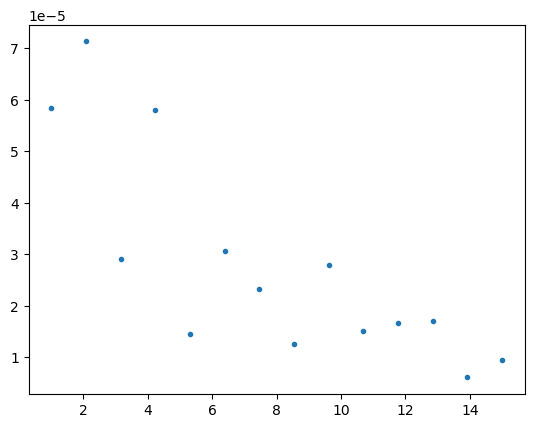

In [34]:
t = np.linspace(1,15,14)
fig, ax = plt.subplots()
ax.plot(t, corr_5_25[0,3,1:,0],marker='.', ls='')
ax.set_ylim()

In [35]:
ncf_25 = len(dst_list_4)
raw_data = []
for i in range(ncf_25):
    raw_data.append(q.load_lat_data(dst_list_4[i]).to_numpy())

nexp = raw_data[0].shape[0]
nt = raw_data[0].shape[1] - 1
ndelta = raw_data[0].shape[2]

corr_arr_25 = np.zeros((ncf_25, nexp, nt, ndelta),dtype=np.complex128)
for i in range(len(raw_data)):
    corr_arr_25[i,:,:,:] = raw_data[i][:,:nt,:]
    
print(corr_arr_25.shape)

(39, 17, 14, 1)


In [47]:
corr_D525_jk = jackblocks_expr(corr_5_25[:,:,:,0], omit=[])
corr_D525_mat_jk = np.zeros((4,4,39,nt),dtype=np.complex128)

corr_D525_avg = np.zeros((4,4,nt),dtype=np.complex128)
corr_D525_err = np.zeros((4,4,nt),dtype=np.complex128)

for i in range(4):
    for j in range(4):
        corr_D525_mat_jk[i,j,:39,:] = corr_D525_jk[:39, i*4 + j + 1, :]

for i in range(4):
    for j in range(4):
        corr_D525_avg[i,j], corr_D525_err[i,j] = jack(corr_D525_mat_jk[i,j,:,:])

## $I=2$ 4x4 GEVP

### No subtraction

In [39]:
nt = 15
nOp = 4
ncf = corr_arr_25.shape[0]
ncf_25 = corr_arr_25.shape[0]

maxOp=4

D1_corr = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)

#corr_D0d6 = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)
#corr_D1d6 = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)
#corr_D2d6 = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)
#corr_D3d6 = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)

corr_D1d0 = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D2d0 = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D1d25 = np.zeros((nOp, nOp, ncf_25, nt), dtype=np.complex128)
corr_D2d25 = np.zeros((nOp, nOp, ncf_25, nt), dtype=np.complex128)
corr_D1d100 = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D2d100 = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)

corr_D0d6_jk = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)
corr_D1d6_jk = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)
corr_D2d6_jk = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)
corr_D3d6_jk = np.zeros((nOp, nOp, ncf_D, nt), dtype=np.complex128)

corr_D1d0_jk = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D2d0_jk = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D1d25_jk = np.zeros((nOp, nOp, ncf_25, nt), dtype=np.complex128)
corr_D2d25_jk = np.zeros((nOp, nOp, ncf_25, nt), dtype=np.complex128)
corr_D1d100_jk = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D2d100_jk = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)

for i in range(nOp):
    for j in range(nOp):
        #corr_D1d0[i,j,:,:] = corr_12_0[:,i+maxOp*j+1,:,0]
        #corr_D1d25[i,j,:,:] = corr_arr_25[:,i+maxOp*j+1,:,0]
        #corr_D1d100[i,j,:,:] = corr_12_100[:,i+maxOp*j+1,:,0]
        #corr_D2d0[i,j,:,:] = corr_12_0[:,i+maxOp*j+1,:,1]
        #corr_D2d25[i,j,:,:] = corr_arr_25[:,i+maxOp*j+1,:,1]
        #corr_D2d100[i,j,:,:] = corr_12_100[:,i+maxOp*j+1,:,1]

        #corr_D0d6[i,j,:,:] = corr_01_6[:,i+maxOp*j+1,:,0,0]
        #corr_D1d6[i,j,:,:] = corr_01_6[:,i+maxOp*j+1,:,1,1]
        #corr_D2d6[i,j,:,:] = corr_23_6[:,i+maxOp*j+1,:,0,0]
        #corr_D3d6[i,j,:,:] = corr_23_6[:,i+maxOp*j+1,:,1,1]

        #corr_D0d6_jk[i,j,:,:] = jackblocks(corr_D0d6[i,j,:,:],omit=[])
        #corr_D1d6_jk[i,j,:,:] = jackblocks(corr_D1d6[i,j,:,:],omit=[])
        #corr_D2d6_jk[i,j,:,:] = jackblocks(corr_D2d6[i,j,:,:],omit=[])
        #corr_D3d6_jk[i,j,:,:] = jackblocks(corr_D3d6[i,j,:,:],omit=[])

        #corr_D1d0_jk[i,j,:,:] = jackblocks(corr_D1d0[i,j,:,:],omit=[])
        #corr_D1d25_jk[i,j,:,:] = jackblocks(corr_D1d25[i,j,:,:],omit=[])
        #corr_D1d100_jk[i,j,:,:] = jackblocks(corr_D1d100[i,j,:,:],omit=[])
        #corr_D2d0_jk[i,j,:,:] = jackblocks(corr_D2d0[i,j,:,:],omit=[])
        #corr_D2d25_jk[i,j,:,:] = jackblocks(corr_D2d25[i,j,:,:],omit=[])
        #corr_D2d100_jk[i,j,:,:] = jackblocks(corr_D2d100[i,j,:,:],omit=[])
        
'''
for i in range(4):
    for j in range(4):
        D1_corr[i,j,:,:] = corr_arr[:,i+maxOp*j+1,:,1,1]
        D1_corr_9[i,j,:,:] = corr_arr_9[:, i+maxOp*j+1,:,0]
        D1_corr_25[i,j,:,:] = corr_arr_25[:,i+maxOp*j+1,:,0]
        D1_corr_100[i,j,:,:] = corr_arr_100[:,i+maxOp*j+1,:,0]
        D2_corr[i,j,:,:] = corr_arr_D23[:,i + maxOp*j+1,:,0,0]
        D2_corr_9[i,j,:,:] = corr_arr_9[:, i+maxOp*j+1,:,1]
        D2_corr_25[i,j,:,:] = corr_arr_25[:,i+maxOp*j+1,:,1]
        D2_corr_100[i,j,:,:] = corr_arr_100[:,i+maxOp*j+1,:,1]
        #D3_corr[i,j,:,:] = corr_arr_D23[:,i+maxOp*j+1,:,1,1]
        #D3_corr_9[i,j,:,:] = corr_arr_9[:, i+maxOp*j+1,:,2]
        D1_corr_jk[i,j,:,:] = jackblocks(D1_corr[i,j,:,:],omit=[])
        D1_corr_jk_9[i,j,:,:] = jackblocks(D1_corr_9[i,j,:,:],omit=[])
        D1_corr_jk_25[i,j,:,:] = jackblocks(D1_corr_25[i,j,:,:],omit=[])
        D1_corr_jk_100[i,j,:,:] = jackblocks(D1_corr_100[i,j,:,:],omit=[])
        D2_corr_jk[i,j,:,:] = jackblocks(D2_corr[i,j,:,:],omit=[])
        D2_corr_jk_9[i,j,:,:] = jackblocks(D2_corr_9[i,j,:,:],omit=[])
        D2_corr_jk_25[i,j,:,:] = jackblocks(D2_corr_25[i,j,:,:],omit=[])
        D2_corr_jk_100[i,j,:,:] = jackblocks(D2_corr_100[i,j,:,:],omit=[])
        #D3_corr_jk[i,j,:,:] = jackblocks(D3_corr[i,j,:,:],omit=[])
        #D3_corr_jk_9[i,j,:,:] = jackblocks(D3_corr_9[i,j,:,:],omit=[])
''';

ValueError: could not broadcast input array from shape (39,14) into shape (39,15)

In [3]:
corr0_avg, corr0_err = jack(corr_D5d25_jk[0,0,:,:].real)
corr1_avg, corr1_err = jack(corr_D5d25_jk[0,1,:,:].real)
corr2_avg, corr2_err = jack(corr_D5d25_jk[2,2,:,:].real)
corr3_avg, corr3_err = jack(corr_D5d25_jk[3,3,:,:].real)

NameError: name 'corr_D5d25_jk' is not defined

In [565]:
corr0_avg

array([0.0493934 , 0.02939747, 0.02320118, 0.01924484, 0.01627756,
       0.01369447, 0.01164128, 0.00992914, 0.0084072 , 0.00718681,
       0.00613458, 0.00520169, 0.00444459, 0.00378579, 0.00324922])

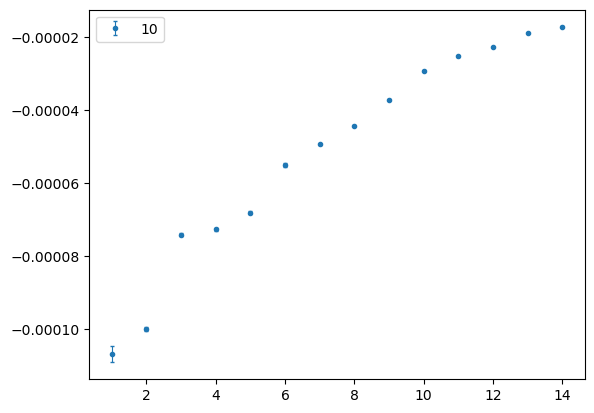

In [57]:
X2 = np.linspace(1,14,14)
fig2, ax2 = plt.subplots()
#ax2.errorbar(X2, corr0_avg, yerr=corr0_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="gs")
#ax2.errorbar(X2, corr1_avg, yerr=corr1_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="01")
ax2.errorbar(X2, corr_D525_avg[0,1,1:].real, yerr=corr_D525_err[1,2,1:].real, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="10")
#ax2.errorbar(X2, corr3_avg, yerr=corr3_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="11")
#ax2.set_yscale("log")
ax2.legend()

In [535]:
corr_D5d25_jk.shape

(4, 4, 91, 15)

#### $\Delta \in [0,1,2,3]$ for $d^2 > 6$ fits and plots

In [302]:
l48ID0d6 = Ensemble_jks(corr_D0d6_jk)
l48ID1d6 = Ensemble_jks(corr_D1d6_jk)
l48ID2d6 = Ensemble_jks(corr_D2d6_jk)
l48ID3d6 = Ensemble_jks(corr_D3d6_jk)

In [303]:
minOp = 0
maxOp = 4
tmin = 2
tmax = 14

GEVP(l48ID0d6, minOp, maxOp, tmin, tmax)
GEVP(l48ID1d6, minOp, maxOp, tmin, tmax)
GEVP(l48ID2d6, minOp, maxOp, tmin, tmax)
GEVP(l48ID3d6, minOp, maxOp, tmin, tmax)

/tmp/ipykernel_1222620/3882348531.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  ens_params.vec[cf,t] = vec_desc


In [304]:
tmin=5
tmax=10
fpD0d6, fcD0d6 = ex_fit_ln(l48ID0d6.ncf,l48ID0d6.e,l48ID0d6.nOp,tmin,tmax)
fpD1d6, fcD1d6 = ex_fit_ln(l48ID1d6.ncf,l48ID1d6.e,l48ID1d6.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(8.114222745215367), np.float64(5.483245313830241)) 4
p-value= 0.1379388206667036
----------------------------------------
n, chi square, dof= 1 (np.float64(1.2467471298398345), np.float64(1.7646578072307222)) 4
p-value= 0.8843744629267467
----------------------------------------
n, chi square, dof= 2 (np.float64(1.822018255415848), np.float64(2.466082178711263)) 4
p-value= 0.7934071280404293
----------------------------------------
n, chi square, dof= 3 (np.float64(7.445681655437659), np.float64(5.3094440189733865)) 4
p-value= 0.16884285468912674
----------------------------------------
n, chi square, dof= 0 (np.float64(3.9616614976142457), np.float64(3.20113829907754)) 4
p-value= 0.4676247140935086
----------------------------------------
n, chi square, dof= 1 (np.float64(6.308042811591919), np.float64(5.05309607567893)) 4
p-value= 0.23755948763617551
----------------------------------------
n, chi square, dof= 2 (np.float64(5.352744233036994), np.flo

In [305]:
tmin = 5
tmax = 9

fpD2d6, fcD2d6 = ex_fit_ln(l48ID2d6.ncf,l48ID2d6.e,l48ID2d6.nOp,tmin,tmax)
fpD3d6, fcD3d6 = ex_fit_ln(l48ID3d6.ncf,l48ID3d6.e,l48ID3d6.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(6.613308675412434), np.float64(4.971242449747695)) 3
p-value= 0.11891840076513871
----------------------------------------
n, chi square, dof= 1 (np.float64(2.063926767061463), np.float64(2.656832058151045)) 3
p-value= 0.5870462917313906
----------------------------------------
n, chi square, dof= 2 (np.float64(16.06047241990524), np.float64(7.8517212373254965)) 3
p-value= 0.004950058303524685
----------------------------------------
n, chi square, dof= 3 (np.float64(8.61065681111235), np.float64(4.942717864977625)) 3
p-value= 0.058805501678854344
----------------------------------------
n, chi square, dof= 0 (np.float64(3.5160297997681176), np.float64(3.597676400535125)) 3
p-value= 0.3576217394328596
----------------------------------------
n, chi square, dof= 1 (np.float64(3.2780286687561078), np.float64(3.571798299690239)) 3
p-value= 0.38864280225519976
----------------------------------------
n, chi square, dof= 2 (np.float64(8.95545137550111), np.

In [306]:
tmin=2
tmax=14
a_inv = 1.73
t=np.arange(tmin,tmax)

Energy= 0 0.28164762853468234 0.00204331310859418
----------------------------------------------------
Energy= 1 0.5261689651265726 0.009614233730721691
----------------------------------------------------
Energy= 2 0.7131146568713663 0.017431649590623585
----------------------------------------------------
Energy= 3 0.8593196865858286 0.025956479941549322
----------------------------------------------------


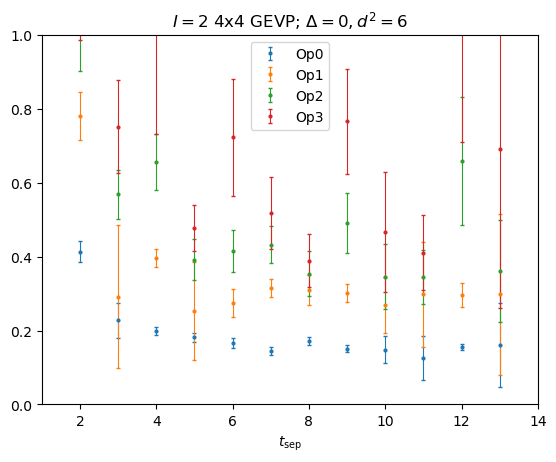

In [307]:
fig3, ax3 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID0d6.e[:,tmin:tmax,l]))
    ax3.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD0d6[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax3.set_ylim(0.0,1.0)
ax3.set_xlim(1,14)
ax3.set_xlabel(r"$t_{\text{sep}}$")
ax3.set_title(r"$I=2$ 4x4 GEVP; $\Delta=0, d^2 = 6$")
ax3.legend();

Energy= 0 0.28278038049083 0.0011706916446109022
----------------------------------------------------
Energy= 1 0.5492455772789865 0.003920447601313381
----------------------------------------------------
Energy= 2 0.7387581191240739 0.006756785879054587
----------------------------------------------------
Energy= 3 0.9081099273975106 0.016501670397064596
----------------------------------------------------


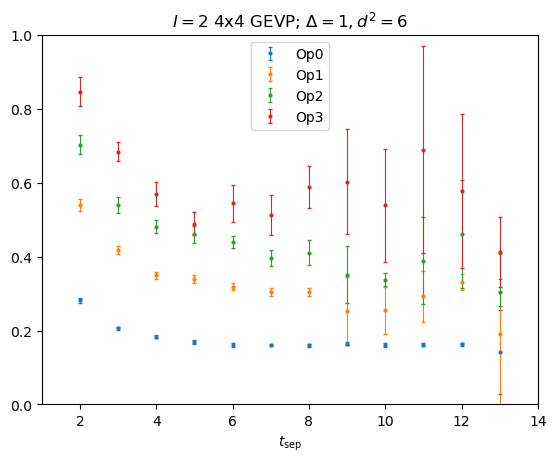

In [308]:
fig3, ax3 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID1d6.e[:,tmin:tmax,l]))
    ax3.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD1d6[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax3.set_ylim(0.0,1.0)
ax3.set_xlim(1,14)
ax3.set_xlabel(r"$t_{\text{sep}}$")
ax3.set_title(r"$I=2$ 4x4 GEVP; $\Delta=1, d^2 = 6$")
ax3.legend();

Energy= 0 0.285177624191244 0.0015984947645035909
----------------------------------------------------
Energy= 1 0.5415635652151252 0.012628397492554238
----------------------------------------------------
Energy= 2 0.6326980219526538 0.011409597832699996
----------------------------------------------------
Energy= 3 0.9505671980411451 0.030606410227372354
----------------------------------------------------


/tmp/ipykernel_1222620/3629074655.py:5: RuntimeWarning: invalid value encountered in log
  v,err=jack(-np.log(l48ID2d6.e[:,tmin:tmax,l]))


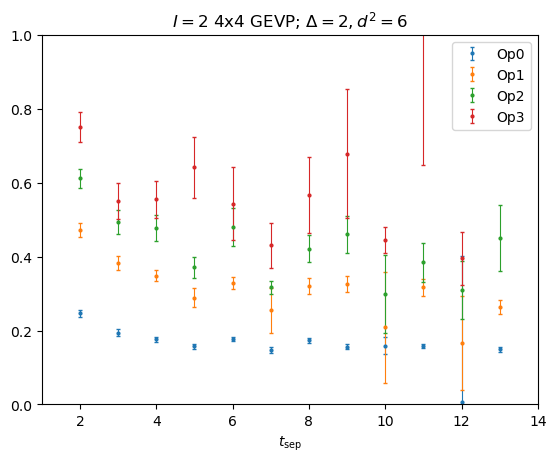

In [309]:
fig3, ax3 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID2d6.e[:,tmin:tmax,l]))
    ax3.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD2d6[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax3.set_ylim(0.0,1.0)
ax3.set_xlim(1,14)
ax3.set_xlabel(r"$t_{\text{sep}}$")
ax3.set_title(r"$I=2$ 4x4 GEVP; $\Delta=2, d^2 = 6$")
ax3.legend();

Energy= 0 0.2791237147125897 0.0013713649318735962
----------------------------------------------------
Energy= 1 0.5583143982730967 0.0037342561842130012
----------------------------------------------------
Energy= 2 0.7628348677292289 0.012464518513768714
----------------------------------------------------
Energy= 3 0.9207356461070125 0.02724424154632391
----------------------------------------------------


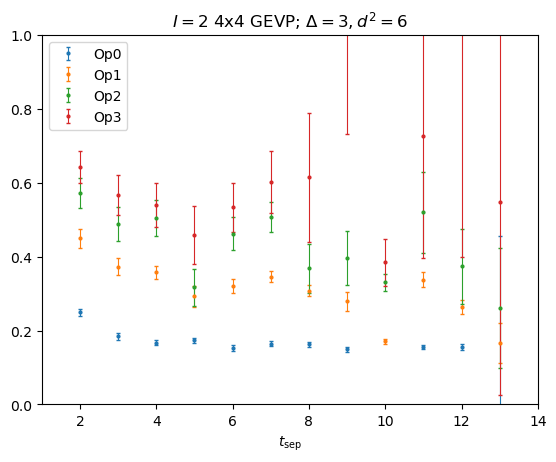

In [310]:
fig3, ax3 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID3d6.e[:,tmin:tmax,l]))
    ax3.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD3d6[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax3.set_ylim(0.0,1.0)
ax3.set_xlim(1,14)
ax3.set_xlabel(r"$t_{\text{sep}}$")
ax3.set_title(r"$I=2$ 4x4 GEVP; $\Delta=3, d^2 = 6$")
ax3.legend();

#### $d^2$ comparison fits and plots

In [319]:
l48ID1d0 = Ensemble_jks(corr_D1d0_jk)
l48ID1d6 = Ensemble_jks(corr_D1d6_jk)
l48ID1d25 = Ensemble_jks(corr_D1d25_jk)
l48ID1d100 = Ensemble_jks(corr_D1d100_jk)

In [320]:
l48ID2d0 = Ensemble_jks(corr_D2d0_jk)
l48ID2d6 = Ensemble_jks(corr_D2d6_jk)
l48ID2d25 = Ensemble_jks(corr_D2d25_jk)
l48ID2d100 = Ensemble_jks(corr_D2d100_jk)

In [105]:
l48ID1d6.jks.shape

(28, 15)

In [321]:
minOp = 0
maxOp = 4
tmin = 2
tmax = 14

GEVP(l48ID1d0, minOp, maxOp, tmin, tmax)
GEVP(l48ID1d6,minOp,maxOp,tmin,tmax)
GEVP(l48ID1d25,minOp,maxOp,tmin,tmax)
GEVP(l48ID1d100,minOp,maxOp,tmin,tmax)

GEVP(l48ID2d0, minOp, maxOp, tmin, tmax)
GEVP(l48ID2d6,minOp,maxOp,tmin,tmax)
GEVP(l48ID2d25,minOp,maxOp,tmin,tmax)
GEVP(l48ID2d100,minOp,maxOp,tmin,tmax)

/tmp/ipykernel_1222620/3882348531.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  ens_params.vec[cf,t] = vec_desc


In [322]:
tmin=5
tmax=10
fpD1d0, fcD1d0 = ex_fit_ln(l48ID1d0.ncf,l48ID1d0.e,l48ID1d0.nOp,tmin,tmax)
fpD1d6, fcD1d6 = ex_fit_ln(l48ID1d6.ncf,l48ID1d6.e,l48ID1d6.nOp,tmin,tmax)
fpD1d25, fcD1d25 = ex_fit_ln(l48ID1d25.ncf,l48ID1d25.e,l48ID1d25.nOp,tmin,tmax)
fpD1d100, fcD1d100 = ex_fit_ln(l48ID1d100.ncf,l48ID1d100.e,l48ID1d100.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(2.391205213111758), np.float64(3.030784153176174)) 4
p-value= 0.713851736638361
----------------------------------------
n, chi square, dof= 1 (np.float64(6.165393570438477), np.float64(4.641657288836642)) 4
p-value= 0.27381094051038235
----------------------------------------
n, chi square, dof= 2 (np.float64(4.483199195344083), np.float64(3.815631308981648)) 4
p-value= 0.42874129268593364
----------------------------------------
n, chi square, dof= 3 (np.float64(5.121742521793437), np.float64(4.079938019964875)) 4
p-value= 0.3623867132084644
----------------------------------------
n, chi square, dof= 0 (np.float64(3.9616614976142457), np.float64(3.20113829907754)) 4
p-value= 0.4676247140935086
----------------------------------------
n, chi square, dof= 1 (np.float64(6.308042811591919), np.float64(5.05309607567893)) 4
p-value= 0.23755948763617551
----------------------------------------
n, chi square, dof= 2 (np.float64(5.352744233036994), np.float6

In [323]:
tmin=5
tmax=9
fpD2d0, fcD2d0 = ex_fit_ln(l48ID2d0.ncf,l48ID2d0.e,l48ID2d0.nOp,tmin,tmax)
fpD2d6, fcD2d6 = ex_fit_ln(l48ID2d6.ncf,l48ID2d6.e,l48ID2d6.nOp,tmin,tmax)
fpD2d25, fcD2d25 = ex_fit_ln(l48ID2d25.ncf,l48ID2d25.e,l48ID2d25.nOp,tmin,tmax)
fpD2d100, fcD2d100 = ex_fit_ln(l48ID2d100.ncf,l48ID2d100.e,l48ID2d100.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(3.9294148974928618), np.float64(3.79159917259133)) 3
p-value= 0.3256153976294981
----------------------------------------
n, chi square, dof= 1 (np.float64(2.356280203521428), np.float64(2.7774153487006927)) 3
p-value= 0.5453456135181882
----------------------------------------
n, chi square, dof= 2 (np.float64(8.479826611437213), np.float64(5.82839043428721)) 3
p-value= 0.07320264766174067
----------------------------------------
n, chi square, dof= 3 (np.float64(14.611949500134557), np.float64(5.4071288749260775)) 3
p-value= 0.011624999071306985
----------------------------------------
n, chi square, dof= 0 (np.float64(6.613308675412434), np.float64(4.971242449747695)) 3
p-value= 0.11891840076513871
----------------------------------------
n, chi square, dof= 1 (np.float64(2.063926767061463), np.float64(2.656832058151045)) 3
p-value= 0.5870462917313906
----------------------------------------
n, chi square, dof= 2 (np.float64(16.06047241990524), np.f

In [325]:
tmin=2
tmax=15
a_inv = 1.73
t=np.arange(tmin,tmax)

Energy= 0 0.28396692348243624 0.001927311851210076
----------------------------------------------------
Energy= 1 0.5520444614721718 0.00477884060847278
----------------------------------------------------
Energy= 2 0.7445842215931255 0.010257910855188608
----------------------------------------------------
Energy= 3 0.9039122887644505 0.01892312162403105
----------------------------------------------------


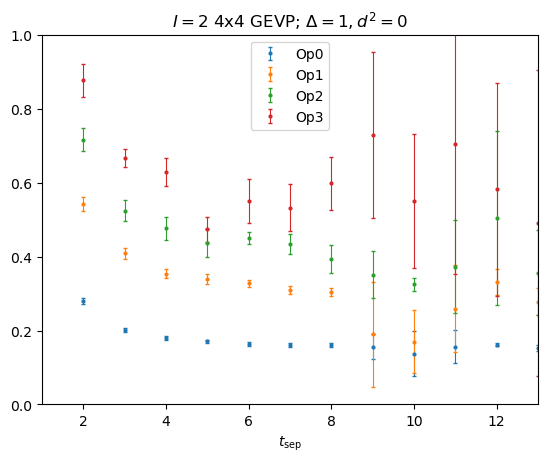

In [277]:
fig3, ax3 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID1d0.e[:,tmin:tmax,l]))
    ax3.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD1d0[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax3.set_ylim(0.0,1.0)
ax3.set_xlim(1,13)
ax3.set_xlabel(r"$t_{\text{sep}}$")
ax3.set_title(r"$I=2$ 4x4 GEVP; $\Delta=1, d^2 = 0$")
ax3.legend();

-------------------------------------
Energy= 0 0.281840484504964 0.0016695386022945481
-------------------------------------
Energy= 1 0.5480757241628832 0.00509272079461642
-------------------------------------
Energy= 2 0.7369136851613955 0.01029579710092231
-------------------------------------
Energy= 3 0.8925815090067287 0.018496701593494518


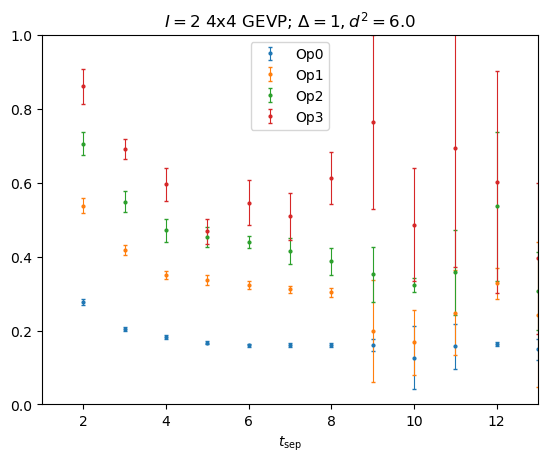

In [278]:
fig4, ax4 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID1d6.e[:,tmin:tmax,l]))
    print("-------------------------------------")
    ax4.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD1d6[l,:,0])
    print('Energy=',l,v*a_inv,err)
    #v,err=jack(fitpars_ex1[l,:,1])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex1[l,:,2])
    #print('DeltaE=',v,err)

#excited states
#for l in range(0,maxOp):
#    v,err=jack(-np.log(l48I2D1.e_o[:,tmin:tmax,l]))
#    print("-------------------------------------")
#    ax4.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
#    v,err=jack(fitpars_ex1[l,:,0])
#    print('Energy=',l,v*a_inv,err)
#    v,err=jack(fitpars_ex1[l,:,1])
#    print('Amp=',v,err)
#    v,err=jack(fitpars_ex1[l,:,2])
#    print('DeltaE=',v,err)

ax4.set_ylim(0.0,1.0)
ax4.set_xlim(1,13)
ax4.set_xlabel(r"$t_{\text{sep}}$")
ax4.set_title(r"$I=2$ 4x4 GEVP; $\Delta=1, d^2 = 6.0$")
ax4.legend();

/tmp/ipykernel_1222620/1938838238.py:5: RuntimeWarning: divide by zero encountered in log
  v,err=jack(-np.log(l48ID1d25.e[:,tmin:tmax,l]))
/tmp/ipykernel_1222620/3581050020.py:40: RuntimeWarning: invalid value encountered in subtract
  err+=(vec[i]-avg)*(vec[i]-avg)


Energy= 0 0.2839626726718786 0.0018934967939471256
----------------------------------------------------
Energy= 1 0.548100046715607 0.005079460146998332
----------------------------------------------------
Energy= 2 0.7337858284496747 0.011375586653088287
----------------------------------------------------
Energy= 3 0.8968627688800419 0.01865266972680788
----------------------------------------------------


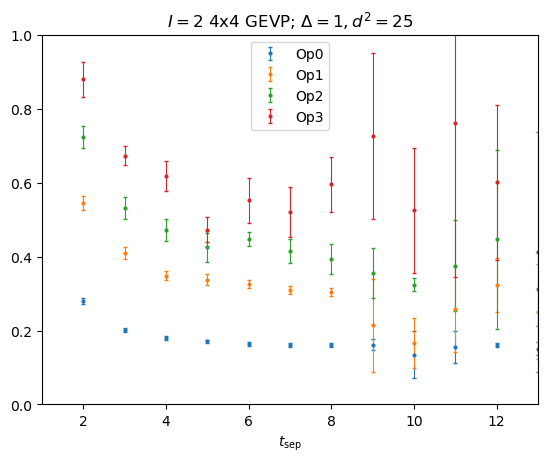

In [326]:
fig5, ax5 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID1d25.e[:,tmin:tmax,l]))
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD1d25[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax5.set_ylim(0.0,1.0)
ax5.set_xlim(1,13)
ax5.set_xlabel(r"$t_{\text{sep}}$")
ax5.set_title(r"$I=2$ 4x4 GEVP; $\Delta=1, d^2 = 25$")
ax5.legend();

Energy= 0 0.2812105857865354 0.0016434518903401792
----------------------------------------------------
Energy= 1 0.5494068482574829 0.004508956931253914
----------------------------------------------------
Energy= 2 0.7336186972647097 0.014842227637903006
----------------------------------------------------
Energy= 3 0.8808132602122717 0.020072232093472378
----------------------------------------------------


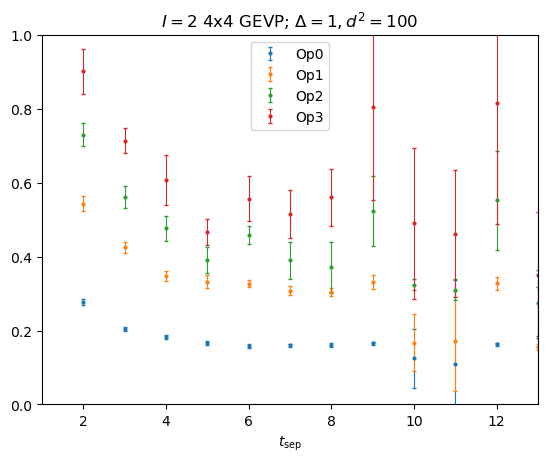

In [280]:
fig6, ax6 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID1d100.e[:,tmin:tmax,l]))
    ax6.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD1d100[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax6.set_ylim(0.0,1.0)
ax6.set_xlim(1,13)
ax6.set_xlabel(r"$t_{\text{sep}}$")
ax6.set_title(r"$I=2$ 4x4 GEVP; $\Delta=1, d^2 = 100$")
ax6.legend();
#plt.savefig("delta1_I2_GEVP.pdf",bbox_inches='tight')

Energy= 0 0.2903481837704648 0.0026841235565890006
----------------------------------------------------
Energy= 1 0.5207982174878171 0.015168603407857658
----------------------------------------------------
Energy= 2 0.6627825237147742 0.011987862356081961
----------------------------------------------------
Energy= 3 0.886606196264879 0.03746635183360165
----------------------------------------------------


/tmp/ipykernel_1222620/2769635167.py:5: RuntimeWarning: invalid value encountered in log
  v,err=jack(-np.log(l48ID2d0.e[:,tmin:tmax,l]))


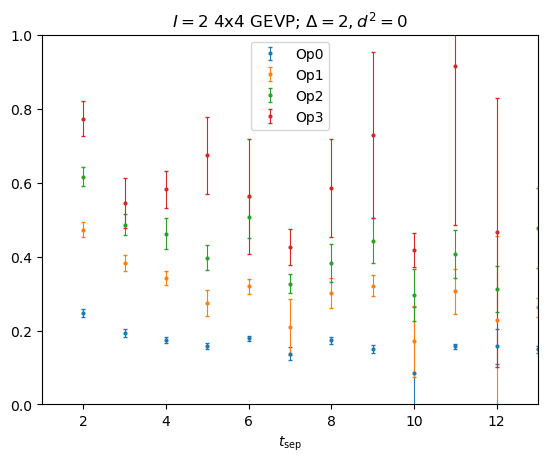

In [262]:
fig7, ax7 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID2d0.e[:,tmin:tmax,l]))
    ax7.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD2d0[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax7.set_ylim(0.0,1.0)
ax7.set_xlim(1,13)
ax7.set_xlabel(r"$t_{\text{sep}}$")
ax7.set_title(r"$I=2$ 4x4 GEVP; $\Delta=2, d^2 = 0$")
ax7.legend();

Energy= 0 0.28825819576059813 0.002714672812232732
----------------------------------------------------
Energy= 1 0.5064544734946539 0.013805458486393165
----------------------------------------------------
Energy= 2 0.66720083120814 0.012051925130370528
----------------------------------------------------
Energy= 3 0.8674531744257337 0.03655322045082075
----------------------------------------------------


/tmp/ipykernel_1222620/3873506503.py:5: RuntimeWarning: invalid value encountered in log
  v,err=jack(-np.log(l48ID2d6.e[:,tmin:tmax,l]))


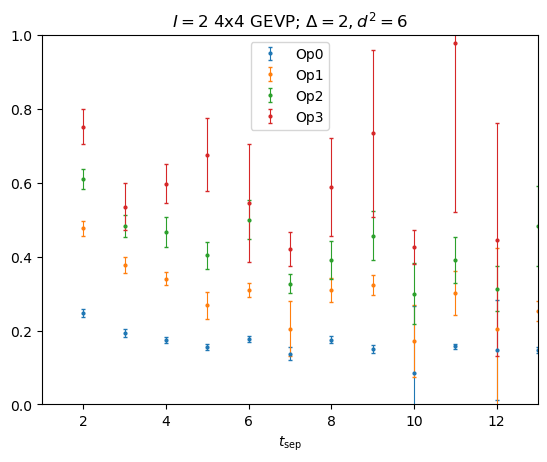

In [263]:
fig7, ax7 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID2d6.e[:,tmin:tmax,l]))
    ax7.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD2d6[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax7.set_ylim(0.0,1.0)
ax7.set_xlim(1,13)
ax7.set_xlabel(r"$t_{\text{sep}}$")
ax7.set_title(r"$I=2$ 4x4 GEVP; $\Delta=2, d^2 = 6$")
ax7.legend();

/tmp/ipykernel_1222620/493932207.py:5: RuntimeWarning: divide by zero encountered in log
  v,err=jack(-np.log(l48ID2d25.e[:,tmin:tmax,l]))
/tmp/ipykernel_1222620/3581050020.py:40: RuntimeWarning: invalid value encountered in subtract
  err+=(vec[i]-avg)*(vec[i]-avg)
/tmp/ipykernel_1222620/493932207.py:5: RuntimeWarning: invalid value encountered in log
  v,err=jack(-np.log(l48ID2d25.e[:,tmin:tmax,l]))


Energy= 0 0.2893982065929138 0.002571950403191907
----------------------------------------------------
Energy= 1 0.523219004725326 0.013525256222481635
----------------------------------------------------
Energy= 2 0.6633051756722903 0.013390604549450291
----------------------------------------------------
Energy= 3 0.8555234623210888 0.03632274137725203
----------------------------------------------------


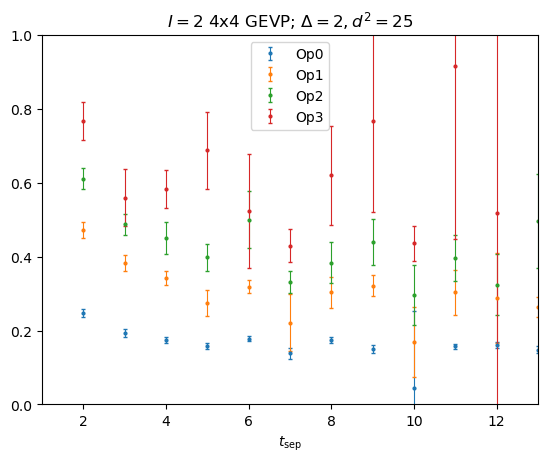

In [327]:
fig8, ax8 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID2d25.e[:,tmin:tmax,l]))
    ax8.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD2d25[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax8.set_ylim(0.0,1.0)
ax8.set_xlim(1,13)
ax8.set_xlabel(r"$t_{\text{sep}}$")
ax8.set_title(r"$I=2$ 4x4 GEVP; $\Delta=2, d^2 = 25$")
ax8.legend();

Energy= 0 0.2852931080672861 0.0024949630026742608
----------------------------------------------------
Energy= 1 0.5146357416921307 0.01325591317127875
----------------------------------------------------
Energy= 2 0.6868867260935936 0.01699836985196665
----------------------------------------------------
Energy= 3 0.8709945930091426 0.03497945587744894
----------------------------------------------------


/tmp/ipykernel_1222620/1012698298.py:5: RuntimeWarning: invalid value encountered in log
  v,err=jack(-np.log(l48ID2d100.e[:,tmin:tmax,l]))


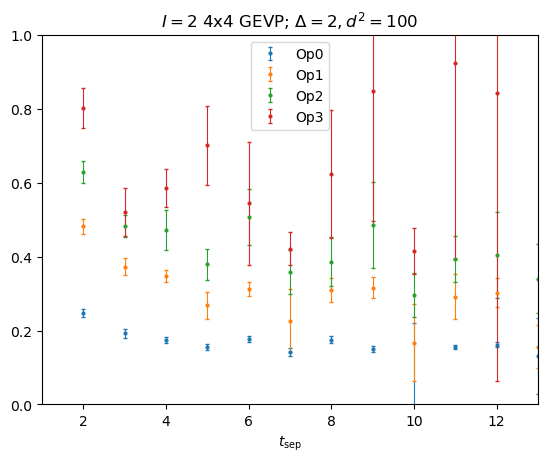

In [281]:
fig9, ax9 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID2d100.e[:,tmin:tmax,l]))
    ax9.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD2d100[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax9.set_ylim(0.0,1.0)
ax9.set_xlim(1,13)
ax9.set_xlabel(r"$t_{\text{sep}}$")
ax9.set_title(r"$I=2$ 4x4 GEVP; $\Delta=2, d^2 = 100$")
ax9.legend();

#### $\Delta \in [1,2,5]$ comparison with $d^2 = 25$ fits and plots 

In [536]:
l48ID1d25 = Ensemble_jks(corr_D1d25_jk)
l48ID2d25 = Ensemble_jks(corr_D2d25_jk)
l48ID5d25 = Ensemble_jks(corr_D5d25_jk)

In [537]:
minOp = 0
maxOp = 4
tmin = 2
tmax = 15

GEVP(l48ID1d25, minOp, maxOp, tmin, tmax)
GEVP(l48ID2d25, minOp, maxOp, tmin, tmax)
GEVP(l48ID5d25, minOp, maxOp, tmin, tmax)

/tmp/ipykernel_1222620/3882348531.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  ens_params.vec[cf,t] = vec_desc


In [556]:
tmin=5
tmax=9
fpD1d25, fcD1d25 = ex_fit_ln(l48ID1d25.ncf,l48ID1d25.e,l48ID1d25.nOp,tmin,tmax)
fpD2d25, fcD2d25 = ex_fit_ln(l48ID2d25.ncf,l48ID2d25.e,l48ID2d25.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(1.559317474658687), np.float64(2.153734010403501)) 3
p-value= 0.677530631882284
----------------------------------------
n, chi square, dof= 1 (np.float64(2.8620005993601407), np.float64(3.413309520309842)) 3
p-value= 0.4282370346374833
----------------------------------------
n, chi square, dof= 2 (np.float64(2.937763471338596), np.float64(3.4845893409433732)) 3
p-value= 0.41637855762994735
----------------------------------------
n, chi square, dof= 3 (np.float64(0.9382218701218036), np.float64(1.9249946383599728)) 3
p-value= 0.8210810014725556
----------------------------------------
n, chi square, dof= 0 (np.float64(4.176721073004457), np.float64(3.7767729435052897)) 3
p-value= 0.25971982773825675
----------------------------------------
n, chi square, dof= 1 (np.float64(1.6809406750015647), np.float64(2.557582025923807)) 3
p-value= 0.6507837485147232
----------------------------------------
n, chi square, dof= 2 (np.float64(1.5870423900934107), np

In [545]:
tmin=4
tmax=8
fpD5d25, fcD5d25 = ex_fit_ln(l48ID5d25.ncf,l48ID5d25.e,l48ID5d25.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(5.142803881758718), np.float64(4.50763898926041)) 3
p-value= 0.17792954621021217
----------------------------------------
n, chi square, dof= 1 (np.float64(6.761976411734997), np.float64(5.201278046665254)) 3
p-value= 0.09324160459496289
----------------------------------------
n, chi square, dof= 2 (np.float64(1.7949069787548162), np.float64(2.330883880554384)) 3
p-value= 0.6264124562565674
----------------------------------------
n, chi square, dof= 3 (np.float64(2.798908845840872), np.float64(3.247576798932504)) 3
p-value= 0.43849330060638314
----------------------------------------


In [558]:
tmin=2
tmax=15
a_inv = 1.73
t=np.arange(tmin,tmax)

Energy= 0 0.2845357677761053 0.0009924519557987848
----------------------------------------------------
Energy= 1 0.5547267844181308 0.0027676117892407514
----------------------------------------------------
Energy= 2 0.7344829501059273 0.005864180322256186
----------------------------------------------------
Energy= 3 0.8786566398482565 0.010987564594793983
----------------------------------------------------


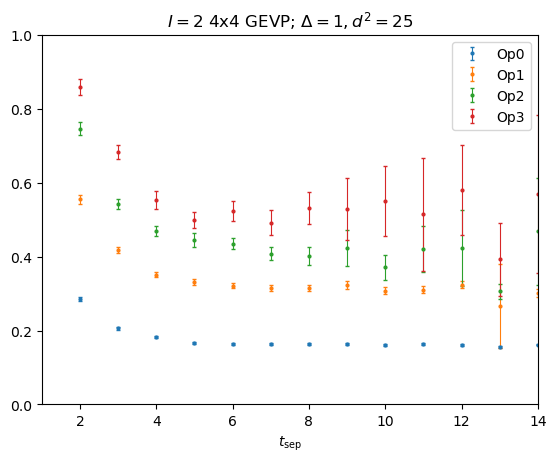

In [559]:
fig5, ax5 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID1d25.e[:,tmin:tmax,l]))
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD1d25[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax5.set_ylim(0,1)
ax5.set_xlim(1,14)
ax5.set_xlabel(r"$t_{\text{sep}}$")
ax5.set_title(r"$I=2$ 4x4 GEVP; $\Delta=1, d^2 = 25$")
ax5.legend();

Energy= 0 0.28468830034160253 0.0007775259406218608
----------------------------------------------------
Energy= 1 0.5577562444341014 0.003122510898317237
----------------------------------------------------
Energy= 2 0.694536555313486 0.01401532379923388
----------------------------------------------------
Energy= 3 0.8998900093719963 0.018593379137961788
----------------------------------------------------


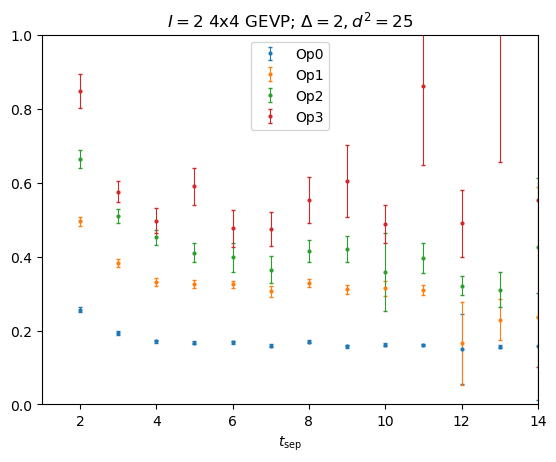

In [560]:
fig5, ax5 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID2d25.e[:,tmin:tmax,l]))
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD2d25[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax5.set_ylim(0.0,1.0)
ax5.set_xlim(1,14)
ax5.set_xlabel(r"$t_{\text{sep}}$")
ax5.set_title(r"$I=2$ 4x4 GEVP; $\Delta=2, d^2 = 25$")
ax5.legend();

Energy= 0 0.28513662911110027 0.0010079597665212004
----------------------------------------------------
Energy= 1 0.5583672615884805 0.00502668378751944
----------------------------------------------------
Energy= 2 0.739559453057214 0.011151780461944774
----------------------------------------------------
Energy= 3 0.8860666170226678 0.017084135033515187
----------------------------------------------------


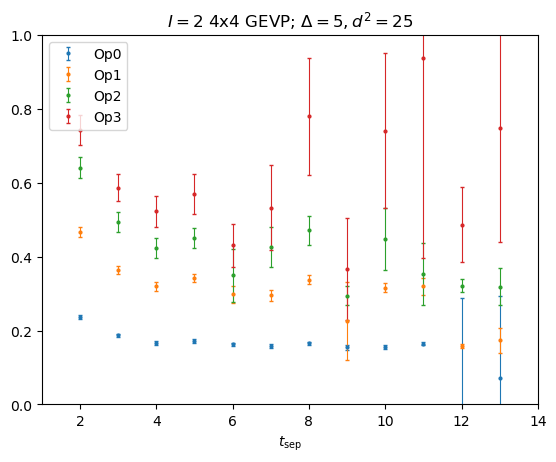

In [548]:
fig5, ax5 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID5d25.e[:,tmin:tmax,l]))
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD5d25[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax5.set_ylim(0,1)
ax5.set_xlim(1,14)
ax5.set_xlabel(r"$t_{\text{sep}}$")
ax5.set_title(r"$I=2$ 4x4 GEVP; $\Delta=5, d^2 = 25$")
ax5.legend();

In [555]:
0.28132 * 1.023

0.28779035999999997

#### $\Delta = 4,5$ for $d^2 > [25, 64, 100]$

In [529]:
nOp = 4
ncf = 91
nt = 15

#corr_D4d16 = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
#corr_D4d16_jk = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)

corr_D5d25 = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)
corr_D5d25_jk = np.zeros((nOp, nOp, ncf, nt), dtype=np.complex128)


for i in range(nOp):
    for j in range(nOp):
        #corr_D4d16[i,j,:,:] = corr_4_16[:,i+maxOp*j+1,:,0]
        #corr_D4d16_jk[i,j,:,:] = jackblocks(corr_D4d16[i,j,:,:], omit=[])
        
        corr_D5d25[i,j,:,:] = corr_5_25[:,i+maxOp*j+1,:,0]
        corr_D5d25_jk[i,j,:,:] = jackblocks(corr_D5d25[i,j,:,:], omit=[])

In [480]:
l48ID5d25 = Ensemble_jks(corr_D5d25_jk)
l48ID4d16 = Ensemble_jks(corr_D4d16_jk)

In [481]:
minOp = 0
maxOp = 4
tmin = 2
tmax = 14

GEVP(l48ID5d25, minOp, maxOp, tmin, tmax)
GEVP(l48ID4d16, minOp, maxOp, tmin, tmax)

/tmp/ipykernel_1222620/3882348531.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  ens_params.vec[cf,t] = vec_desc


In [487]:
tmin=5
tmax=10
fpD4d16, fcD4d16 = ex_fit_ln(l48ID4d16.ncf,l48ID4d16.e,l48ID4d16.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(4.913760288955401), np.float64(4.278027036608368)) 4
p-value= 0.35763883942943897
----------------------------------------
n, chi square, dof= 1 (np.float64(1.7686586565499083), np.float64(2.81399258858319)) 4
p-value= 0.8021376163518197
----------------------------------------
n, chi square, dof= 2 (np.float64(1.0510930892351644), np.float64(1.719806508591394)) 4
p-value= 0.9125417637218183
----------------------------------------
n, chi square, dof= 3 (np.float64(4.826498054328172), np.float64(4.167412449293811)) 4
p-value= 0.36671234926700613
----------------------------------------


In [483]:
tmin=4
tmax=8
fpD5d25, fcD5d25 = ex_fit_ln(l48ID5d25.ncf,l48ID5d25.e,l48ID5d25.nOp,tmin,tmax)

n, chi square, dof= 0 (np.float64(4.978149882494579), np.float64(4.276573995815089)) 3
p-value= 0.2130028473050931
----------------------------------------
n, chi square, dof= 1 (np.float64(1.1870043232639647), np.float64(1.6150683001855506)) 3
p-value= 0.7716481346433821
----------------------------------------
n, chi square, dof= 2 (np.float64(6.442633616227342), np.float64(4.762377206579081)) 3
p-value= 0.12635950741081847
----------------------------------------
n, chi square, dof= 3 (np.float64(2.562008128344198), np.float64(3.036107686950587)) 3
p-value= 0.4971964869963389
----------------------------------------


In [489]:
tmin=2
tmax=14
a_inv = 1.73
t=np.arange(tmin,tmax)

Energy= 0 0.27933652086991123 0.002077455626064275
----------------------------------------------------
Energy= 1 0.5514537993512099 0.007090889119677476
----------------------------------------------------
Energy= 2 0.7088512817102685 0.023665804830913118
----------------------------------------------------
Energy= 3 0.8456549726654262 0.02237511160201448
----------------------------------------------------


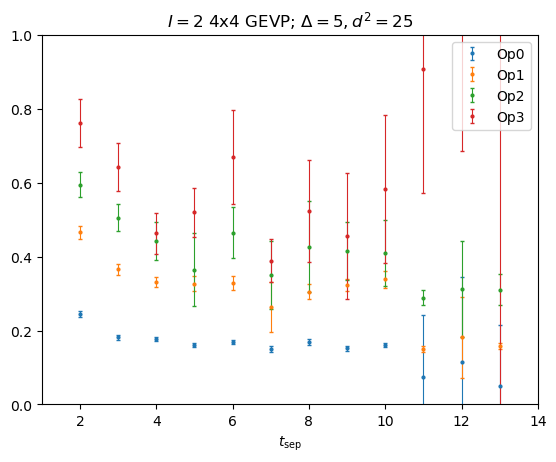

In [490]:
fig5, ax5 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID4d16.e[:,tmin:tmax,l]))
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD4d16[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax5.set_ylim(0.0,1.0)
ax5.set_xlim(1,14)
ax5.set_xlabel(r"$t_{\text{sep}}$")
ax5.set_title(r"$I=2$ 4x4 GEVP; $\Delta=5, d^2 = 25$")
ax5.legend();

Energy= 0 0.2811098361153229 0.003737214183394093
----------------------------------------------------
Energy= 1 0.5517256006723507 0.0077262434610924635
----------------------------------------------------
Energy= 2 0.6765858655103872 0.015878684909919005
----------------------------------------------------
Energy= 3 0.9214924139234875 0.026304831983000394
----------------------------------------------------


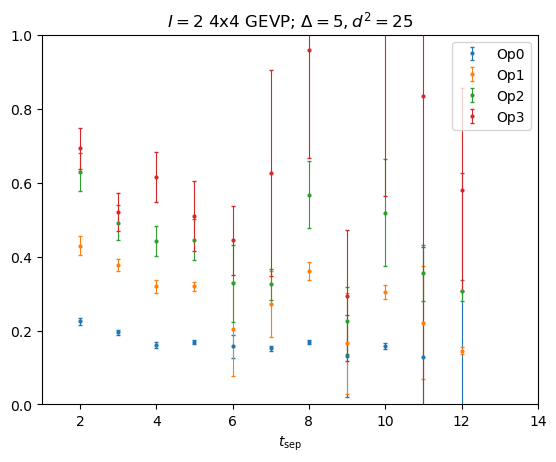

In [486]:
fig5, ax5 = plt.subplots()

#excited states
for l in range(0,maxOp):
    v,err=jack(-np.log(l48ID5d25.e[:,tmin:tmax,l]))
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fpD5d25[l,:,0])
    print('Energy=',l,v*a_inv,err)
    print("----------------------------------------------------")
    #v,err=jack(A[:,l])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex0[l,:,2])
    #print('DeltaE=',v,err)
ax5.set_ylim(0.0,1.0)
ax5.set_xlim(1,14)
ax5.set_xlabel(r"$t_{\text{sep}}$")
ax5.set_title(r"$I=2$ 4x4 GEVP; $\Delta=5, d^2 = 25$")
ax5.legend();

### ATW time series Subtraction

In [1457]:
delta_min = 3
delta_max = 8
l48ID1_ATW_list = ATW_subtract_data(D1_corr, delta_min, delta_max)
l48ID2_ATW_list = ATW_subtract_data(D2_corr, delta_min, delta_max)

In [1460]:
#GEVP(l48I2D0_sub, minOp, maxOp, tmin, tmax_s)
#GEVP(l48I2D1_sub, minOp, maxOp, tmin, tmax_s)
minOp = 0
maxOp = 4
tmin = 2
for i in range(len(l48ID1_ATW_list)):
    GEVP(l48ID1_ATW_list[i],minOp,maxOp,tmin,l48ID1_list[i].nt)
    GEVP(l48ID2_ATW_list[i], minOp, maxOp, tmin, l48ID1_list[i].nt)

/tmp/ipykernel_1480523/3882348531.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  ens_params.vec[cf,t] = vec_desc


In [1473]:
fitpars_ex_list = []
fitcov_ex_list = []
#fitpars_gs_list = []
#fitcov_gs_list = []
tmin_fit = 5
tmax_fit = 11
for i in range(len(l48ID1_ATW_list)):
    fp_ex, fc_ex = ex_fit_ln(l48ID1_ATW_list[i].ncf,l48ID1_ATW_list[i].e, maxOp, tmin_fit, l48ID1_ATW_list[i].nt-1)
    print("----------------------------------------")
    #fp_gs, fc_gs = gs_fit(l48ID1_list[i], maxOp, tmin, l48ID1_list[i].nt)

    fitpars_ex_list.append(fp_ex)
    fitcov_ex_list.append(fc_ex)
    #fitpars_gs_list.append(fp_gs)
    #fitcov_gs_list.append(fc_gs)

n, chi square, dof= 0 (np.float64(3.152701988999853), np.float64(0.12305339704642436)) 5
p-value= 0.7254387487488987
----------------------------------------
n, chi square, dof= 1 (np.float64(5.912806366575918), np.float64(0.20068695428203223)) 5
p-value= 0.3982626146198742
----------------------------------------
n, chi square, dof= 2 (np.float64(8.80527153852338), np.float64(0.2471168479622145)) 5
p-value= 0.19120421452188818
----------------------------------------
n, chi square, dof= 3 (np.float64(3.3912863926390586), np.float64(0.18537796425517564)) 5
p-value= 0.6937349450705338
----------------------------------------
----------------------------------------
n, chi square, dof= 0 (np.float64(4.579585414599311), np.float64(0.19017265664027605)) 4
p-value= 0.39191912936290185
----------------------------------------
n, chi square, dof= 1 (np.float64(4.839301860496237), np.float64(0.1764050906462435)) 4
p-value= 0.3637882295143452
----------------------------------------
n, chi squa

In [1595]:
fitpars_ex_list[0].shape

(4, 40, 1)

In [1474]:
fitpars_ex_list2 = []
fitcov_ex_list2 = []
#fitpars_gs_list = []
#fitcov_gs_list = []
tmin_fit = 5
tmax_fit = 11
for i in range(len(l48ID2_ATW_list)):
    fp_ex, fc_ex = ex_fit_ln(l48ID2_ATW_list[i].ncf,l48ID2_ATW_list[i].e, maxOp, tmin_fit, l48ID2_ATW_list[i].nt-1)
    print("----------------------------------------")
    #fp_gs, fc_gs = gs_fit(l48ID1_list[i], maxOp, tmin, l48ID1_list[i].nt)

    fitpars_ex_list2.append(fp_ex)
    fitcov_ex_list2.append(fc_ex)
    #fitpars_gs_list.append(fp_gs)
    #fitcov_gs_list.append(fc_gs)

n, chi square, dof= 0 (np.float64(6.013846527335424), np.float64(0.12059174454338772)) 5
p-value= 0.3886465573013187
----------------------------------------
n, chi square, dof= 1 (np.float64(26.128918878505477), np.float64(0.12693603425621794)) 5
p-value= 0.0022116881586030646
----------------------------------------
n, chi square, dof= 2 (np.float64(11.299621012250451), np.float64(0.25111731022290656)) 5
p-value= 0.09866815995350742
----------------------------------------
n, chi square, dof= 3 (np.float64(9.11094562153959), np.float64(0.17463443937085163)) 5
p-value= 0.1764516187029156
----------------------------------------
----------------------------------------
n, chi square, dof= 0 (np.float64(4.28632864686776), np.float64(0.09419910824410381)) 4
p-value= 0.42586334160676464
----------------------------------------
n, chi square, dof= 1 (np.float64(5.745536735950592), np.float64(0.24183636032873912)) 4
p-value= 0.27903868416406397
----------------------------------------
n, ch

-----------------[delta_t = 0]--------------------
Energy= 0 0.2873642390201185 0.0010049261101584457
-----------------[delta_t = 0]--------------------
Energy= 1 0.5622039609841748 0.0029798152227333056
-----------------[delta_t = 0]--------------------
Energy= 2 0.7576716096635975 0.005897219846285244
-----------------[delta_t = 0]--------------------
Energy= 3 0.9288983711641932 0.014070514311395511
------------------[delta_t = 3]---------------------
Energy= 0 0.28399350590255584 0.002718111493508007
------------------[delta_t = 3]---------------------
Energy= 1 0.5384984612008696 0.006596779837070524
------------------[delta_t = 3]---------------------
Energy= 2 0.7234819139845415 0.014977517990018518
------------------[delta_t = 3]---------------------
Energy= 3 0.8757512919079127 0.02086541348186076
------------------[delta_t = 4]---------------------
Energy= 0 0.28698856414051416 0.002566693529606694
------------------[delta_t = 4]---------------------
Energy= 1 0.5418173734093

Text(0.5, 0, 'tsep')

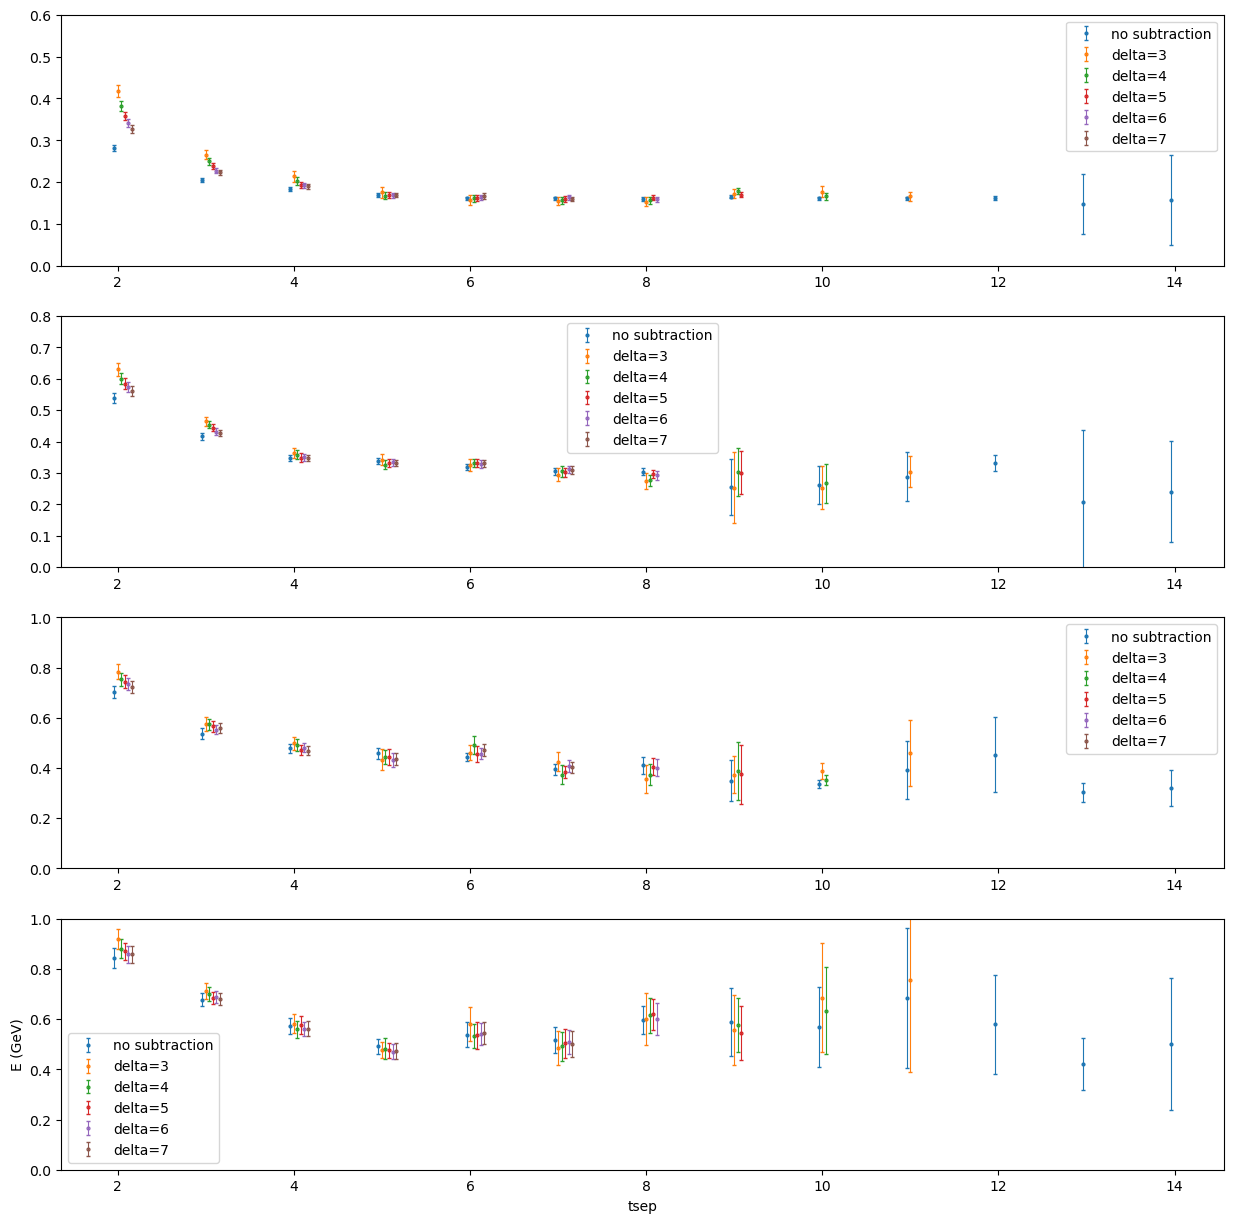

In [1471]:
fig2, ax2 = plt.subplots(4,figsize=(15,15))

#plotting the no subtraction data
tmax = l48I2D1.nt
tmin = 2
t = np.arange(tmin-0.04,tmax-0.04)
for l in range(0,maxOp):
    v,err=jack(-np.log(l48I2D1.e[:,tmin:tmax,l]))
    print("-----------------[delta_t = 0]--------------------")
    ax2[l].errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='no subtraction')
    v,err=jack(fitpars_ex1[l,:,0])
    print('Energy=',l,v*a_inv,err)
    #v,err=jack(fitpars_ex1[l,:,1])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex1[l,:,2])
    #print('DeltaE=',v,err)


#plotting data for delta_t in [1,5]
for i in range(len(l48ID1_list)):
    tmax = l48ID1_list[i].nt
    tmin = 2

    t0 = np.arange(tmin,tmax)
    t1 = np.arange(tmin+0.04, tmax+0.04)
    t2 = np.arange(tmin+0.08, tmax+0.08)
    t3 = np.arange(tmin+0.12, tmax+0.12)
    t4 = np.arange(tmin + 0.16, tmax+0.16)
    t_list = [t0,t1,t2,t3,t4]

    #excited states
    for l in range(0,maxOp):
        v,err=jack(-np.log(l48ID1_list[i].e[:,tmin:tmax,l]))
        print(f"------------------[delta_t = {i+3}]---------------------")
        ax2[l].errorbar(t_list[i],v,err,marker='o',mfc='none',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label=f"delta={i+3}")
        v,err=jack(fitpars_ex_list[i][l,:,0])
        print('Energy=',l,v*a_inv,err)
        #v,err=jack(fitpars_ex_list[i][l,:,1])
        #print('Amp=',v,err)
        #v,err=jack(fitpars_ex_list[i][l,:,2])
        #print('DeltaE=',v,err)
        #ax2[l].set_ylim(0,1)
        ax2[l].legend()

ax2[0].set_ylim(0,0.6)
ax2[1].set_ylim(0,0.8)
ax2[2].set_ylim(0,1)
ax2[3].set_ylim(0,1)

ax2[3].set_ylabel("E (GeV)")
ax2[3].set_xlabel("tsep")

    #ground state
    #v,err=jack(-np.log(l48ID1_list[i].e[:,tmin:tmax,3]))
    #print("---------------------------------------")
    #ax2[3].errorbar(t_list[i],v,err,marker='o',mfc='none',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label=f'delta={i+1}')
    #v,err=jack(fitpars_gs_list[i][:,0])
    #print('Energy=',0,v*a_inv,err)
    #ax2[3].set_ylim(0,0.5)
    #ax2[3].legend()
    

In [1477]:
l48I2D2.e[0,:,0]

array([0.        , 0.        , 0.78124016, 0.82333763, 0.83868347,
       0.85424275, 0.83798446, 0.86363629, 0.84055463, 0.85584717,
       0.85192993, 0.85342903, 0.98466669, 0.86127609, 0.        ])

-----------------[delta_t = 0]--------------------
Energy= 0 0.28704117355269143 0.0009627650894567542
-----------------[delta_t = 0]--------------------
Energy= 1 0.5645148664772343 0.006114957030144533
-----------------[delta_t = 0]--------------------
Energy= 2 0.6642555169541932 0.009580560820063791
-----------------[delta_t = 0]--------------------
Energy= 3 0.9500932078881862 0.022366541324395795
------------------[delta_t = 3]---------------------
Energy= 0 0.29136340908836716 0.004551248018716016
------------------[delta_t = 3]---------------------
Energy= 1 0.46835357828784796 0.010216289130104606
------------------[delta_t = 3]---------------------
Energy= 2 0.5984912085238276 0.015698935726330267
------------------[delta_t = 3]---------------------
Energy= 3 0.8908582788337006 0.03216879810948035
------------------[delta_t = 4]---------------------
Energy= 0 0.29716315375408886 0.0027608005517214774
------------------[delta_t = 4]---------------------
Energy= 1 0.53585335316

/tmp/ipykernel_1480523/2324792057.py:8: RuntimeWarning: invalid value encountered in log
  v,err=jack(-np.log(l48I2D2.e[:,tmin:tmax,l]))


Text(0.5, 0, 'tsep')

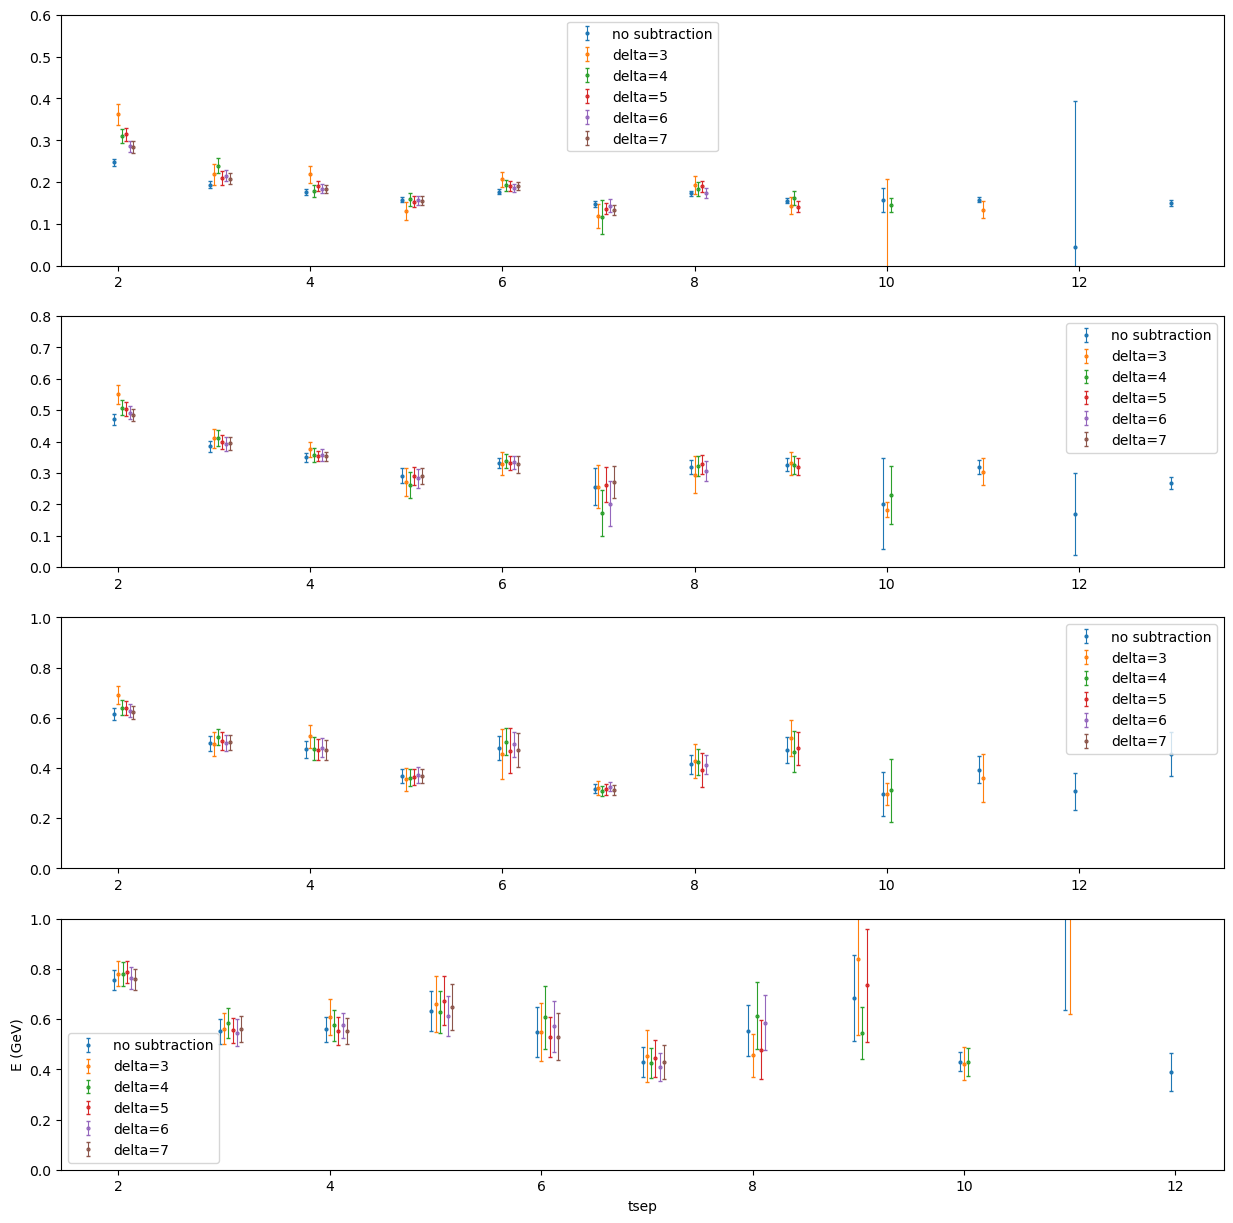

In [1478]:
fig2, ax2 = plt.subplots(4,figsize=(15,15))

#plotting the no subtraction data
tmax = l48I2D2.nt-1
tmin = 2
t = np.arange(tmin-0.04,tmax-0.04)
for l in range(0,maxOp):
    v,err=jack(-np.log(l48I2D2.e[:,tmin:tmax,l]))
    print("-----------------[delta_t = 0]--------------------")
    ax2[l].errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='no subtraction')
    v,err=jack(fitpars_ex2[l,:,0])
    print('Energy=',l,v*a_inv,err)
    #v,err=jack(fitpars_ex1[l,:,1])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex1[l,:,2])
    #print('DeltaE=',v,err)


#plotting data for delta_t in [1,5]
for i in range(len(l48ID2_ATW_list)):
    tmax = l48ID2_ATW_list[i].nt
    tmin = 2

    t0 = np.arange(tmin,tmax)
    t1 = np.arange(tmin+0.04, tmax+0.04)
    t2 = np.arange(tmin+0.08, tmax+0.08)
    t3 = np.arange(tmin+0.12, tmax+0.12)
    t4 = np.arange(tmin + 0.16, tmax+0.16)
    t_list = [t0,t1,t2,t3,t4]

    #excited states
    for l in range(0,maxOp):
        v,err=jack(-np.log(l48ID2_ATW_list[i].e[:,tmin:tmax,l]))
        print(f"------------------[delta_t = {i+3}]---------------------")
        ax2[l].errorbar(t_list[i],v,err,marker='o',mfc='none',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label=f"delta={i+3}")
        v,err=jack(fitpars_ex_list2[i][l,:,0])
        print('Energy=',l,v*a_inv,err)
        #v,err=jack(fitpars_ex_list[i][l,:,1])
        #print('Amp=',v,err)
        #v,err=jack(fitpars_ex_list[i][l,:,2])
        #print('DeltaE=',v,err)
        #ax2[l].set_ylim(0,1)
        ax2[l].legend()

ax2[0].set_ylim(0,0.6)
ax2[1].set_ylim(0,0.8)
ax2[2].set_ylim(0,1)
ax2[3].set_ylim(0,1)

ax2[3].set_ylabel("E (GeV)")
ax2[3].set_xlabel("tsep")

-----------------------------------------
Energy= 1 0.9191352083510319 0.023042300258740586
Amp= 2.508358358137702 0.9908252229151613
DeltaE= 0.9647052779871855 0.1960176155515652
-----------------------------------------
Energy= 2 0.6277735002950366 0.02756294187904856
Amp= 1.1333084368483493 0.34359430681154596
DeltaE= 0.535230755088504 0.14858564368718155
-----------------------------------------
Energy= 3 0.5050128185620738 0.01093724348276606
Amp= 1.2784164101566429 0.2853198289259286
DeltaE= 0.6994951561034874 0.10617263440642843
-----------------------------------------
Energy= 0 0.29610025876904805 0.00709880870460249


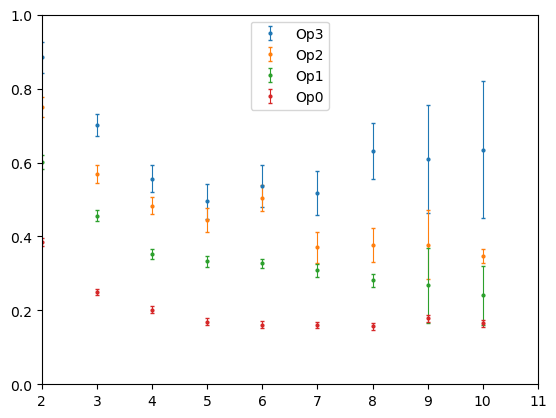

In [668]:
#plot
avg=np.average(l48I2D1_sub.e,axis=0)
# data range
tmin=2
tmax=11
a_inv = 1.73
t=np.arange(tmin,tmax)
fig5, ax5 = plt.subplots()

#excited states
for l in range(maxOp-1):
    v,err=jack(-np.log(l48I2D1_sub.e[:,tmin:tmax,l]))
    print("-----------------------------------------")
    ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(3-l))
    v,err=jack(fitpars_ex_s1[l,:,0])
    print('Energy=',l+1,v*a_inv,err)
    v,err=jack(fitpars_ex_s1[l,:,1])
    print('Amp=',v,err)
    v,err=jack(fitpars_ex_s1[l,:,2])
    print('DeltaE=',v,err)

#ground state
v,err=jack(-np.log(l48I2D1_sub.e[:,tmin:tmax,3]))
print("-----------------------------------------")
ax5.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op0')
v,err=jack(fitpars_gs_s[:,0])
print('Energy=',0,v*a_inv,err)

ax5.set_ylim(0.0,1.0)
ax5.set_xlim(2,11)
ax5.legend()

### Dispersion relation method

The dispersion relation method is a way to cancel artifacts between interacting and non-interacting two-pion energies. We determine the non-interacting energy $E^0_n$ from a product of two expectation values of single pion correlators, $C^0(t)$. This non-interacting correlator matrix is diagonal with analogous two-pion effective energies, $E^{0,eff}_1(t,t_0) < ... < E^{0,eff}_N(t,t_0)$. We can then calculate the energy shift of two pion states due to interactions
$$
\Delta E^{eff}_n(t,t_0) = E^{eff}_n(t,t_0) - E^{0,eff}(t,t_0)
$$

Where the interacting two pion effective energies $E^{eff}_n(t,t_0)$ are determined from the GEVP eigenvalues from the 4x4 interacting correlator matrix. We the obtain an improved two-pion energy,


$$
E^{eff}_n(t,t_0) = E^{0,\text{disp}_n + \Delta E^{eff}_n(t,t_0)
$$

$E^{0,\text{disp}}_n = 2\sqrt{m_{\pi}^2 + |\vec{p_n}|^2} $

In [1597]:
#load in the single pion correlators
p000 = np.load("/home/jhildebrand28/ktopipi/single_pion_corr_000.npy")
p001 = np.load("/home/jhildebrand28/ktopipi/single_pion_corr_001.npy")
p011 = np.load("/home/jhildebrand28/ktopipi/single_pion_corr_011.npy")
p111 = np.load("/home/jhildebrand28/ktopipi/single_pion_corr_111.npy")
m_pi_jk = np.load("/home/jhildebrand28/ktopipi/pion_mass_jk.npy")

In [1598]:
#construct non-interacting two pion correlators as products of single pion correlators
# C^0_{pipi}(t,p) = C_{pi}(t,p) * C_pi(t,-p)
ncf_pi = p000.shape[0]
nt = p000.shape[1]

C0_2pi_000 = np.zeros_like(p000)
C0_2pi_001 = np.zeros_like(p000)
C0_2pi_011 = np.zeros_like(p000)
C0_2pi_111 = np.zeros_like(p000)

#we compute a product of single pion correlators for the non-interacting two pion correlator.
for cf in range(ncf_pi):
    for t in range(nt):
        C0_2pi_000[cf,t] = p000[cf,t] * p000[cf,t]
        C0_2pi_001[cf,t] = p001[cf,t] * p001[cf,t]
        C0_2pi_011[cf,t] = p011[cf,t] * p011[cf,t]
        C0_2pi_111[cf,t] = p111[cf,t] * p111[cf,t]


In [1695]:
#Now we calculate effective energies
#effective mass calculation using two data points/log definition. This uses only one half of the correlator data. This is for the one term fit function
def eff_mass_2d_ln_half(corr_data):
    ncf = corr_data.shape[0]
    nt = corr_data.shape[1]
    m_data = np.zeros((ncf, nt-2),np.float64)
    E = 0.0
    for cf in range(ncf):
        for t in range(nt-2):
        #E = np.arccosh((C_fold[t] + C_fold[t+2])/(2*C_fold[t+1]))
            E = np.log(corr_data[cf,t]/corr_data[cf,t+1])
            #E = -np.log(corr_data[cf,t])
            m_data[cf,t] = E

    return m_data

#mode is an integer input, from which we write the momentum to be used in the relation
def E_disp(m_pi, mode, L):
    p_x = (2*np.pi)/L
    if mode == 0:
        return 2*m_pi
    elif mode == 1:
        return 2*np.sqrt(m_pi**2 + p_x**2)
    elif mode == 2:
        return 2*np.sqrt(m_pi**2 + p_x**2 + p_x**2)
    elif mode == 3:
        return 2*np.sqrt(m_pi**2 + p_x**2 + p_x**2 + p_x**2)
    

In [1696]:
#non-interacting two-pion energies
E0_0 = eff_mass_2d_ln_half(C0_2pi_000)
E0_1 = eff_mass_2d_ln_half(C0_2pi_001)
E0_2 = eff_mass_2d_ln_half(C0_2pi_011)
E0_3 = eff_mass_2d_ln_half(C0_2pi_111)

ncf_2pi = 40
E0_list = [E0_0[:40], E0_1[:40], E0_2[:40], E0_3[:40]]

In [1773]:
#function that calculates the jackblocks, average and error of the DR energies. returns all three 
#takes in a correlator struct and the pion mass jackblocks
def DR_data(Ens):
    m_pi_jk = np.load("/home/jhildebrand28/ktopipi/pion_mass_jk.npy")
    ncf = Ens.ncf
    nt = Ens.nt
    #print(nt)
    nOp = 4
    L = 48
    tmax = nt
    tmin = 2
    eigval = np.zeros((ncf,nt,4))
    m_pi_arr = np.zeros((ncf))
    
    eigval = Ens.e
    m_pi_arr = m_pi_jk[:ncf]

    E_eff = np.zeros((ncf, tmax-tmin, 4))
    E_dispersion = np.zeros((ncf,4))
    #E_eff_err = np.zeros((tmax-tmin,4))
    
    #E_eff is the interacting two pion energies from the GEVP evals
    #E_dispersion is the two pion dispersion relation using a calculated pion mass on the ensemble we are using
    for l in range(nOp):
        E_eff[:,:,l] = -np.log(eigval[:,tmin:tmax,l])
        E_dispersion[:,l] = E_disp(m_pi_arr[:],l,L)

    #difference in interacting and non-interacting two pion energies
    DeltaE = np.zeros((ncf, tmax-tmin, 4))
    
    for l in range(nOp):
        for t in range(tmin, tmax-2):
            DeltaE[:,t,l] = E_eff[:,t,l] - E0_list[l][:,t+3]

    #DR Effective energy calculation, sum of two pion dispersion and the difference of the int and non-iont two pion energies
    E_eff_p = np.zeros_like(E_eff)
    
    for l in range(nOp):
        for t in range(0,tmax-tmin):
            E_eff_p[:,t,l] = E_dispersion[:,l] + DeltaE[:,t,l]

    E_eff_avg = np.zeros((tmax-tmin, 4))
    E_eff_err = np.zeros((tmax-tmin, 4))
    
    for l in range(nOp):
        E_eff_avg[:,l], E_eff_err[:,l] = jack(E_eff_p[:,:,l])

    return E_eff_p, E_eff_avg, E_eff_err

In [1775]:
E_avg_D1_l[1][:8,:] - E_avg_D1_l[2]

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00840216,  0.00633665,  0.01192366, -0.01609158],
       [-0.00167238, -0.00360628, -0.00736935,  0.01598405],
       [ 0.00019087, -0.00075971,  0.04319221, -0.00345809],
       [-0.00082386,  0.00525199, -0.02206628,  0.00621347],
       [-0.00870825, -0.01507788, -0.02531689, -0.01659009],
       [ 0.00839956, -0.00456844,  0.01218923,  0.03099101]])

In [1774]:
#create the ATW time series subtraction data for the DR energies
E_jk_D1_d0, E_avg_D1_d0, E_err_D1_d0 = DR_data(l48I2D1)

E_jk_D1_l = []
E_avg_D1_l = []
E_err_D1_l = []

for i in range(len(l48ID1_ATW_list)):
    Ejk, Eavg, Eerr = DR_data(l48ID1_ATW_list[i])
    E_jk_D1_l.append(Ejk)
    E_avg_D1_l.append(Eavg)
    E_err_D1_l.append(Eerr)

print(len(E_jk_D1_l))

5


In [1776]:
#constant fit of the DR energies
tmin_DR0 = 4
tmax_DR0 = 10
nOp = 4
fitpars_DR_D1_d0, fitcov_DR_D1_d0 = ex_fit(ncf_2pi, E_jk_D1_d0, nOp, tmin_DR0, tmax_DR0) #fit is wrong

fp_DR_D1 = []
fc_DR_D1 = []
for i in range(len(l48ID1_ATW_list)):
    fp, fc = ex_fit(ncf_2pi, E_jk_D1_l[i], nOp, tmin_DR0, tmax_DR0)
    fp_DR_D1.append(fp)
    fc_DR_D1.append(fc)

(40, 13, 4)
n, chi square, dof= 0 (np.float64(2.625965090271381), np.float64(0.19586033664815974)) 5
p-value= 0.7949926870476328
----------------------------------------
n, chi square, dof= 1 (np.float64(3.2930970964618966), np.float64(0.21451021812052865)) 5
p-value= 0.706768442956032
----------------------------------------
n, chi square, dof= 2 (np.float64(15.350979798460122), np.float64(0.1739168518462488)) 5
p-value= 0.03353966920124196
----------------------------------------
n, chi square, dof= 3 (np.float64(0.9439812581849886), np.float64(0.169201716330346)) 5
p-value= 0.9721943701736719
----------------------------------------
(40, 10, 4)
n, chi square, dof= 0 (np.float64(0.3387268200312872), np.float64(0.1435085722056135)) 5
p-value= 0.9973428140338992
----------------------------------------
n, chi square, dof= 1 (np.float64(2.387838715770676), np.float64(0.21256339936255195)) 5
p-value= 0.8255648299772411
----------------------------------------
n, chi square, dof= 2 (np.fl

In [1726]:
E_avg_D1_l[-1][:,0].shape

(6,)

-----------------[GEVP energies]--------------------
Energy= 0 0.2873642390201185 0.0010049261101584457
-----------------[GEVP energies]--------------------
Energy= 1 0.5622039609841748 0.0029798152227333056
-----------------[GEVP energies]--------------------
Energy= 2 0.7576716096635975 0.005897219846285244
-----------------[GEVP energies]--------------------
Energy= 3 0.9288983711641932 0.014070514311395511
-----------------[DR method]--------------------
Energy= 0 0.27748950189482186 0.0011935493450831536
-----------------[DR method]--------------------
Energy= 1 0.5316697844314648 0.005267876760618463
-----------------[DR method]--------------------
Energy= 2 0.6816264766269444 0.007363733646774143
-----------------[DR method]--------------------
Energy= 3 0.9479606151996555 0.020098083452391446


(0.25, 0.8)

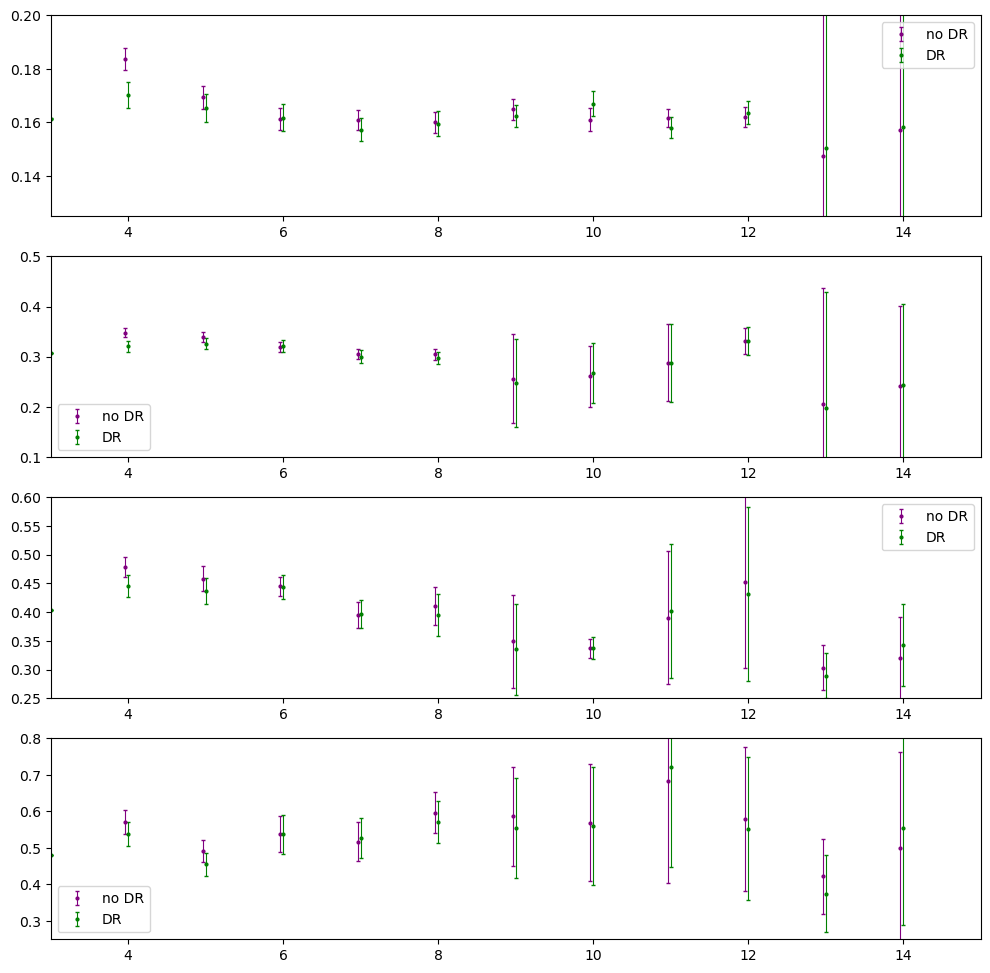

In [1778]:
#plot of DR and GEVP energies for no subtraction on the same plot

fig11, ax11 = plt.subplots(4,figsize=(12,12))

tmax = l48I2D1.nt
tmin = 2
t = np.arange(tmin-0.04,tmax-0.04)
for l in range(0,maxOp):
    v,err=jack(-np.log(l48I2D1.e[:,tmin:tmax,l]))
    print("-----------------[GEVP energies]--------------------")
    ax11[l].errorbar(t,v,err,marker='o',linestyle='',color="purple",elinewidth=0.8,markersize=2,capsize=1.5,label='no DR')
    v,err=jack(fitpars_ex1[l,:,0])
    print('Energy=',l,v*a_inv,err)

t = np.arange(2,15)
for l in range(0,maxOp):
    print("-----------------[DR method]--------------------")
    v,err=jack(fitpars_DR_D1_d0[l,:,0])
    print('Energy=',l,v*a_inv,err)
    ax11[l].errorbar(t,E_avg_D1_d0[:,l],yerr=E_err_D1_d0[:,l],marker='o',linestyle='',color="green",elinewidth=0.8,markersize=2,capsize=1.5,label=f'DR')
    ax11[l].set_xlim(3,15)
    ax11[l].legend()

ax11[0].set_ylim(0.125,0.2)
ax11[1].set_ylim(0.1,0.5)
ax11[2].set_ylim(0.25,0.6)
ax11[3].set_ylim(0.25,0.8)

In [1771]:
l48ID1_ATW_list[0].e[0,:10,:] - l48ID1_ATW_list[2].e[0,:,:] 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.70749040e-02, -2.07964039e-02, -1.50378942e-02,
        -1.83564566e-02],
       [-2.36557702e-02, -1.57097091e-02, -8.17074130e-03,
        -1.25166924e-02],
       [-1.67189883e-02, -9.39409938e-03, -1.90704509e-02,
        -2.20892533e-03],
       [-4.96561806e-03, -6.28949369e-03,  4.17939509e-03,
         3.33649544e-03],
       [ 5.59970131e-03,  6.50764961e-04,  8.33690469e-05,
        -2.51666314e-02],
       [ 1.51228937e-03,  5.47933513e-03, -2.60874630e-02,
        -3.01996825e-03],
       [ 6.90433277e-03,  5.66056555e-03,  3.55294803e-02,
         1.04769526e-03],
       [ 1.13207149e-03,  6.03170432e-02,  8.12086882e-03,
        -2.23793284e-02]])

-----------------[DR method]--------------------
Energy= 0 0.27748950189482186 0.0011935493450831536
-----------------[DR method]--------------------
Energy= 1 0.5316697844314648 0.005267876760618463
-----------------[DR method]--------------------
Energy= 2 0.6816264766269444 0.007363733646774143
-----------------[DR method]--------------------
Energy= 3 0.9479606151996555 0.020098083452391446
-----------------[DR, d=3]--------------------
Energy= 0 [0.27206094] [0.00454223]
-----------------[DR, d=3]--------------------
Energy= 1 [0.51918354] [0.00972763]
-----------------[DR, d=3]--------------------
Energy= 2 [0.64836053] [0.01556486]
-----------------[DR, d=3]--------------------
Energy= 3 [1.00345445] [0.03634107]
-----------------[DR, d=4]--------------------
Energy= 0 [0.2779526] [0.003816]
-----------------[DR, d=4]--------------------
Energy= 1 [0.51813977] [0.00895998]
-----------------[DR, d=4]--------------------
Energy= 2 [0.67957634] [0.01098751]
-----------------[DR, d=

Text(0.5, 0, 'tsep')

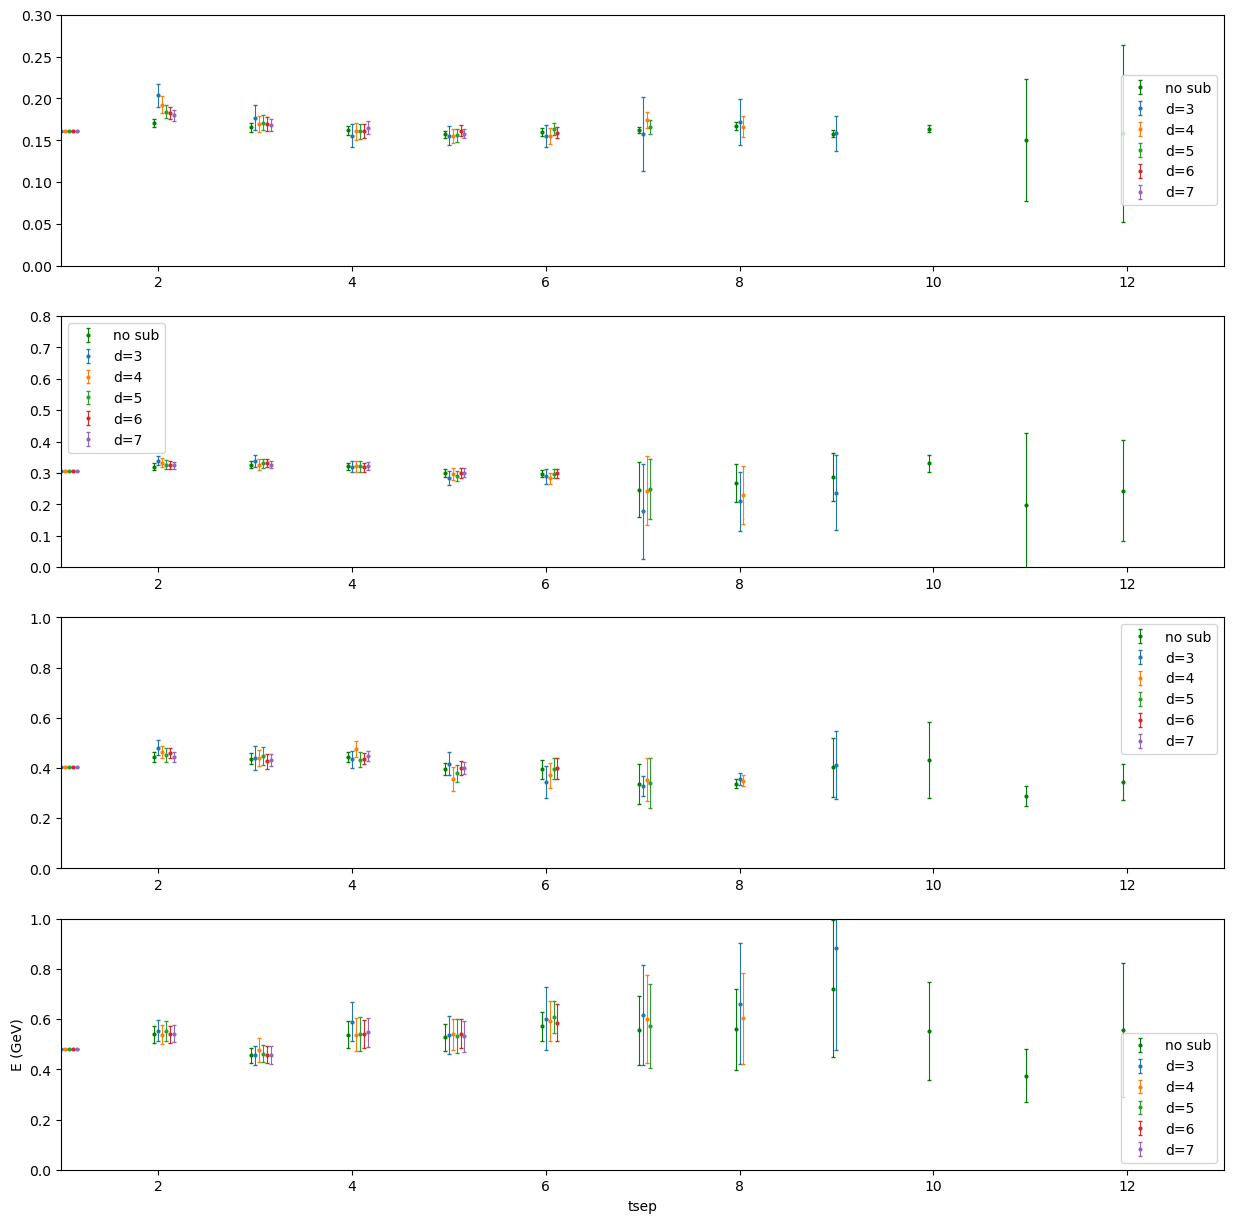

In [1783]:
#plot of all DR ATW subtraction data
fig12, ax12 = plt.subplots(4,figsize=(15,15))

#plotting the no subtraction data
tmax = 15
tmin = 2
t = np.arange(-0.04,tmax-tmin-0.04)
for l in range(0,maxOp):
    print("-----------------[DR method]--------------------")
    v,err=jack(fitpars_DR_D1_d0[l,:,0])
    print('Energy=',l,v*a_inv,err)
    ax12[l].errorbar(t,E_avg_D1_d0[:,l],yerr=E_err_D1_d0[:,l],marker='o',linestyle='',color="green",elinewidth=0.8,markersize=2,capsize=1.5,label=f'no sub')
    ax12[l].set_xlim(3,15)
    ax12[l].legend()
    #v,err=jack(fitpars_ex1[l,:,1])
    #print('Amp=',v,err)
    #v,err=jack(fitpars_ex1[l,:,2])
    #print('DeltaE=',v,err)


#plotting data for delta_t in [1,5]
for i in range(len(l48ID2_ATW_list)):
    tmax = l48ID2_ATW_list[i].nt
    tmin = 2

    t0 = np.arange(0,tmax-tmin)
    t1 = np.arange(0.04, tmax-tmin+0.04)
    t2 = np.arange(0.08, tmax-tmin+0.08)
    t3 = np.arange(0.12, tmax-tmin+0.12)
    t4 = np.arange(0.16, tmax-tmin+0.16)
    t_list = [t0,t1,t2,t3,t4]


    for l in range(nOp):
        print(f"-----------------[DR, d={i+3}]--------------------")
        v,err=jack(fp_DR_D1[i][l,:])
        print('Energy=',l,v*a_inv,err)
        ax12[l].errorbar(t_list[i],E_avg_D1_l[i][:,l],yerr=E_err_D1_l[i][:,l],marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label=f'd={i+3}')
        #v,err=jack(fitpars_ex_list[i][l,:,1])
        #print('Amp=',v,err)
        #v,err=jack(fitpars_ex_list[i][l,:,2])
        #print('DeltaE=',v,err)
        #ax2[l].set_ylim(0,1)
        ax12[l].set_xlim(1,13)
        ax12[l].legend()

ax12[0].set_ylim(0,0.3)
ax12[1].set_ylim(0,0.8)
ax12[2].set_ylim(0,1)
ax12[3].set_ylim(0,1)

ax12[3].set_ylabel("E (GeV)")
ax12[3].set_xlabel("tsep")

In [1444]:
def ATW_subtract_data(Ens, raw_corr, delta_t_min, delta_t_max):
    corr_sub_list = []
    corr_sub_jk = []
    Ens_list = []
    maxOp = raw_corr.shape[0]

    delta_t_range = np.arange(delta_t_min, delta_t_max)

    for delta_t in delta_t_range:
        corr_sub_list.append(atw_subtract(raw_corr,delta_t))

    for corr in corr_sub_list:
        corr_jk = np.zeros_like(corr)
        for i in range(maxOp):
            for j in range(maxOp):
                corr_jk[i,j,:,:] = jackblocks(corr[i,j,:,:], omit = [])

        corr_sub_jk.append(corr_jk)
        Ens_list.append(Ens())

    for i in range(len(corr_sub_list)):
        Ens_list[i].jks = corr_sub_jk[i]
        Ens_list[i].ncf = Ens_list[i].jks.shape[2]
        Ens_list[i].nt = Ens_list[i].jks.shape[3]

    print(len(corr_sub_jk))
    print(corr_sub_jk[1].shape)

### ATW 3pt function

In [1989]:
dst1102 = "/home/jhildebrand28/ktopipi/results/48I/auto-contract/traj-1102/pipi_ATW_psnk_psrc.lat"
ld1102 = q.load_lat_data(dst1102)
q.display_info(ld1102.info())

[['expr_name', 17, ['< 1 >  exprs[0]', '< wf(0) * wf(0) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[1]', '< wf(1) * wf(0) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[2]', '< wf(2) * wf(0) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[3]', '< wf(3) * wf(0) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[4]', '< wf(0) * wf(1) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[5]', '< wf(1) * wf(1) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[6]', '< wf(2) * wf(1) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[7]', '< wf(3) * wf(1) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[8]', '< wf(0) * wf(2) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[9]', '< wf(1) * wf(2) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[10]', '< wf(2) * wf(2) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[11]', '< wf(3) * wf(2) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[12]', '< wf(0) * wf(3) * pi+^dag(0) * pipi_i20(-t_int) * pi+(-t) >  exprs[13]', '< wf(1)

In [340]:
dst = "/home/jhildebrand28/ktopipi/results/48I/auto-contract/"
dst_list_3pt = []

for traj in range(1102,1493,10):
    dst_list_3pt.append(dst+f"traj-{traj}/pipi_ATW_psnk_psrc.lat")

for traj in range(1505,1596,10):
    dst_list_3pt.append(dst+f"traj-{traj}/pipi_ATW_psnk_psrc.lat")

ncf3pt = len(dst_list_3pt)
raw_data = []

for i in range(ncf3pt):
    raw_data.append(q.load_lat_data(dst_list_3pt[i]).to_numpy())

thpt_arr = np.array(raw_data)
print(thpt_arr.shape)



(50, 17, 23, 2)


In [2278]:
len(dst_list_3pt)

50

In [355]:
thpt_jk = jackblocks(thpt_arr[:,1,:,0],omit=[])
thpt_avg, thpt_err = jack(thpt_jk)

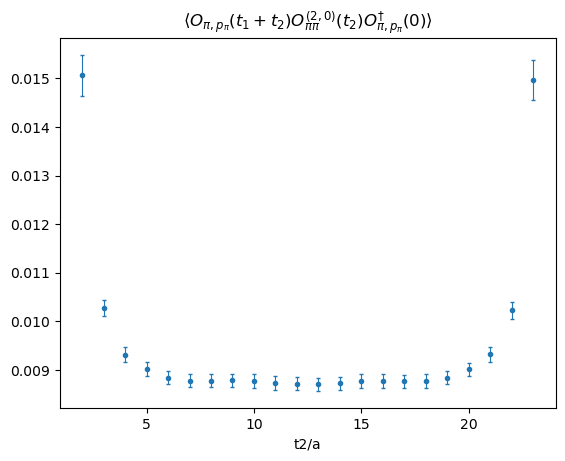

In [356]:
t2 = np.linspace(2,23,22)
fig30, ax30 = plt.subplots()
ax30.errorbar(t2, thpt_avg[1:].real, yerr=thpt_err[1:].real, marker='.', ls='', elinewidth=0.8, capsize=1.5)
#ax30.set_ylim(0.0075,0.0120)
ax30.set_xlabel("t2/a")
#ax30.set_yscale("log")
ax30.set_title(r"$\langle O_{\pi,p_{\pi}}(t_1 + t_2) O^{(2,0)}_{\pi\pi}(t_2) O^{\dagger}_{\pi,p_{\pi}}(0)\rangle$");

#ax30.set_ylim(0.0075,0.0120) #gs
#ax30.set_ylim(0.00005,0.0001) #6
#ax30.set_ylim(0.5e-5,0.8e-5) #11
#ax30.set_ylim(0.00005,0.0001) # 16

In [2577]:
nOp = 4
ncf = thpt_arr.shape[0]
nt = thpt_arr.shape[2]
C_3pt_all_D1 = np.zeros((4,4,ncf,nt))
C_3pt_all_D2 = np.zeros((4,4,ncf,nt))

for i in range(nOp):
    for j in range(nOp):
        C_3pt_all_D1[i,j,:,:] = thpt_arr[:,i+nOp*j+1,:,0].real
        C_3pt_all_D2[i,j,:,:] = thpt_arr[:,i+nOp*j+1,:,1].real

In [2463]:
#three point function for ground state single pions, (0,0,0) two pion momentum projections, and Delta=1.
C_3pt_00D1 = thpt_arr[:,1,:,0]
C_3pt_00D2 = thpt_arr[:,1,:,1]

C_3pt_11D1 = thpt_arr[:,6,:,0]
C_3pt_11D2 = thpt_arr[:,6,:,1]

C_3pt_22D2 = thpt_arr


C_3pt_00D1.shape

(50, 23)

We have computed the three point function 
$$
C^{\text{3pt}}_{a,b} = \langle O_{\pi,a}(t_1+t_2) \ O_{2\pi,b}^{(2,0)}(t_1) \ O^{\dagger}_{\pi}(0)_a \rangle
$$
where the $a$ and $b$ label the single or two pion operator based on momentum projection. The single pions are treated with opposite momenta, and the two pion operator carries its own momentum projection, where the single pions in the two pion operator have equal and opposite momenta. 

We are interested in extracting matrix elements that couple strongly to a given energy state - to do this we need to project the sinlge pion operators to the energy state we are interested in for the matrix element. In the single pion analysis, I did not perform a GEVP as the four lowest states of the pion were well resolved without it. Thus we could use the raw three point function, or we could do a GEVP of the single pion data and use the vectors to project the single pion operators to a given energy state.  

On top of this, since we are aiming to do a systematic error subtraction with the results of a two pion GEVP, we also need to project the two pion operator in the three point function to that of the energy state we are trying to subtract. 

Method 1: No projections - just use the raw correlator data in the ratio for the matrix elements

Method 2: Only project the two pion operator in the three point function using the GEVP eigenvectors from the two pion two piont function, since the single pion states are well resolved without a GEVP

Method 3: project all three operators. This will require a single pion GEVP to get the eigenvectors.

From this three point function we wish to extract the matrix elements corresponding to the around the world thermal effects, where a single pion propagates backward through the periodic boundary
$$
\langle \pi(\vec{p}_1) | O^{(2,0)}_{2\pi}(\vec{p}_2) | \pi(-\vec{p}_1) \rangle
$$

This can be done by calculating the effective matrix elements (method 1) 
$$
M^{\text{eff}}_{a,b,c,i}(t_1,t_2) = C^{\text{3pt}}_{a,b,c}(t_1,t_2) R^{\pi}_a(t_1) R^{\pi}_a(t_2)
$$
where 
$$
R^{\pi}_a(t_1) = e^{E^{\text{eff}}_a(t_1) t_1/2}[C^{\text{2pt}}_{\pi}(t_1)]^{-1/2}
$$

And the three point function used here depends on the method. For method 2, where we project the two pion operator using the two pion two point function GEVP eigenvectors, we define the projected three point functio 
$$
C^{\text{3pt}}_{a,b,n,i} = \sum_{c}V_{n,c} \ C^{\text{3pt}}_{c,i}
$$

where $c$ is the index that labels which 2pi operator momentum projection we are using, and we project the three point functions to a state that couples most strongly with the $n$th energy state using the GEVP eigenvectors of that state. 

#### Method 1

Here we will simply construct the ratios with the raw correlator, no projection of any operators, and look at the result. 

In [2357]:
#function that calculates the ratio term for a two point function with energy E. 
#we will use this for both R factors for the single pions, noting the argument in each R factor depends on the separation from that operator 
# to the two pion operator insertion. Thus we input some integer t to tell us what range to loop through
#outputs an array with a jk block and time index. 
#Epi is the effective mass for the nth energy state. it has shape (njk, nt)
def R_pi(C2pt_jack, Epi):
    t_max_sep = 23 #t_1 + t_2 - this is constant. 
    Rpi = np.zeros((C2pt_jack.shape[0], t_max_sep+1)) 
    ncf = C2pt_jack.shape[0]
    for cf in range(ncf):
        for t in range(0,t_max_sep+1):
            Rpi[cf,t] = np.exp(Epi[cf,t]*(t/2))*(C2pt_jack[cf,t])**(-1/2)

    return Rpi

In [2532]:
pion_corr_000 = np.load("single_pion_corr_000.npy")
pion_corr_001 = np.load("single_pion_corr_001.npy")
pion_corr_011 = np.load("single_pion_corr_011.npy")
pion_corr_111 = np.load("single_pion_corr_111.npy")
pion_list = [pion_corr_000,pion_corr_001,pion_corr_011,pion_corr_111]
pion_corr_000.shape

(50, 49)

In [2465]:
pion_em_000 = np.load("pion_em_000.npy")
pion_em_001 = np.load("pion_em_001.npy")
pion_em_011 = np.load("pion_em_011.npy")
pion_em_111 = np.load("pion_em_111.npy")
pion_em_000.shape

(50, 47)

In [2469]:
C_3pt_00D1.shape

(50, 23)

In [2466]:
R_000 = R_pi(pion_corr_000, pion_em_000)
R_001 = R_pi(pion_corr_001, pion_em_001)
R_000.shape

(50, 24)

In [2407]:
R000_avg

array([ 1.17239226,  2.19826311,  2.75211862,  2.96560117,  3.17386868,
        3.4493345 ,  3.66891864,  3.98879796,  4.35238595,  4.60196933,
        5.11421096,  5.44008938,  5.83220869,  6.59445311,  6.738348  ,
        7.41117296,  8.30868831,  8.50502644,  9.89982179,  9.81334899,
       11.65478082, 11.46084253, 12.74533421, 13.95014476])

<ErrorbarContainer object of 3 artists>

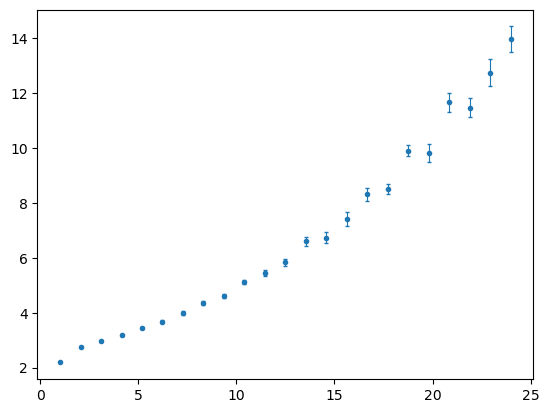

In [2361]:
t2_plot = np.linspace(2,23,22)
t_pion = np.linspace(1,24,23)
R000_avg, R000_err = jack(R_000)
fig31, ax31 = plt.subplots()
ax31.errorbar(t_pion, R000_avg[1:],yerr=R000_err[1:], marker=".", ls='', elinewidth=0.8, capsize=1.5)

(0.0, 24.0)

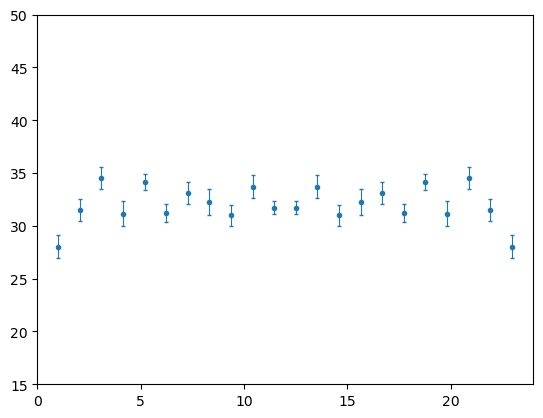

In [2364]:
R_mult = np.zeros_like(R_000)
for cf in range(25):
    for t2 in range(1,t_max_sep):
        t1 = t_max_sep - t2
        R_mult[cf,t2] = R_000[cf,t2]*R_000[cf,t1]

R_mult_avg, R_mult_err = jack(R_mult)

fig31, ax31 = plt.subplots()
ax31.errorbar(t_pion, R_mult_avg[1:],yerr=R_mult_err[1:], marker=".", ls='', elinewidth=0.8, capsize=1.5)
ax31.set_ylim(15,50)
ax31.set_xlim(0,24)

In [2420]:
print(R_mult_avg[2])
print(thpt_avg[2])
print(thpt_avg[1] * R_mult_avg[1])

31.541665594554043
(0.010272360080699806+6.33860320171182e-07j)
(0.42208622936341184+4.507627494725037e-05j)


In [2411]:
M_eff_00D1_avg[12]

np.float64(0.1712015282804028)

In [2457]:
np.mean(M_eff_00D1[:,10])

np.complex128(0.301423095162718+2.8789125167812084e-05j)

In [2497]:
M_eff_00D1_err

array([0.        , 0.        , 1.70578906, 0.69505664, 0.2626749 ,
       0.25642126, 0.23150006, 0.23450636, 0.22050296, 0.20938357,
       0.2264989 , 0.22667701, 0.22429528, 0.22785042, 0.2158716 ,
       0.22025962, 0.23307146, 0.21500804, 0.22630985, 0.21802387,
       0.23021062, 0.23803438, 0.21892185])

In [2507]:
ncf

50

In [2578]:
t_max_sep = 23
M_eff_00D1 = np.zeros_like(C_3pt_00D1)
M_eff_00D2 = np.zeros_like(C_3pt_00D2)

M_eff_11D1 = np.zeros_like(C_3pt_11D1)
M_eff_11D2 = np.zeros_like(C_3pt_11D2)
ncf = C_3pt_00D1.shape[0]

for cf in range(ncf):
    for t2 in range(2,t_max_sep):
        t1 = t_max_sep - t2
        M_eff_00D1[cf,t2] = C_3pt_00D1[cf,t2-2]*R_000[cf,t2]*R_000[cf,t1]
        M_eff_00D2[cf,t2] = C_3pt_00D2[cf,t2-2]*R_000[cf,t2]*R_000[cf,t1]

        M_eff_11D1[cf,t2] = C_3pt_11D1[cf,t2]*R_001[cf,t2]*R_001[cf,t1]
        M_eff_11D2[cf,t2] = C_3pt_11D2[cf,t2]*R_001[cf,t2]*R_001[cf,t1]

In [2579]:
M_eff_00D1_avg, M_eff_00D1_err = jack(M_eff_00D1.real)
M_eff_00D2_avg, M_eff_00D2_err = jack(M_eff_00D2.real)

M_eff_11D1_avg, M_eff_11D1_err = jack(M_eff_11D1.real)
M_eff_11D2_avg, M_eff_11D2_err = jack(M_eff_11D2.real)

In [2582]:
M_eff_00D1.shape

(50, 23)

(1.0, 23.0)

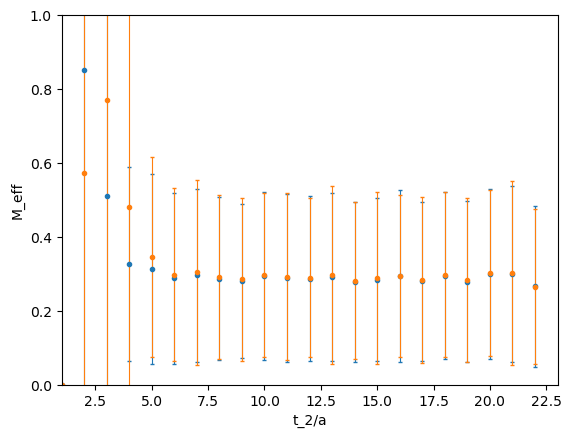

In [2585]:
fig31, ax31 = plt.subplots()
ax31.errorbar(range(1,t_max_sep),M_eff_00D1_avg[1:],yerr=M_eff_00D1_err[1:],marker='.',ls='',elinewidth=0.8,capsize=1.5,label="Delta=1")
ax31.errorbar(range(1,t_max_sep),M_eff_00D2_avg[1:],yerr=M_eff_00D2_err[1:],marker='.',ls='',elinewidth=0.8,capsize=1.5,label="Delta=2")
ax31.set_xlabel("t_2/a")
ax31.set_ylabel("M_eff")
ax31.set_ylim(0.0,1)
ax31.set_xlim(1,23)


(1.0, 23.0)

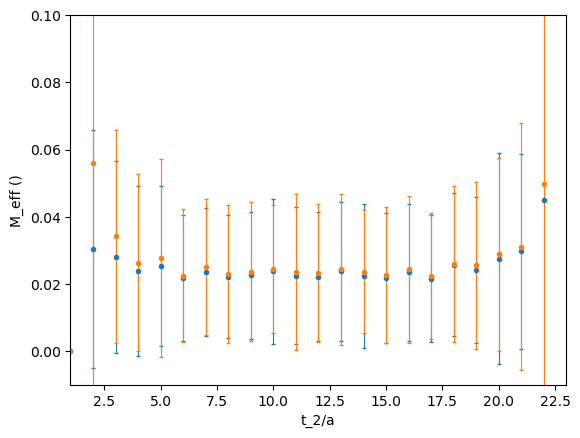

In [2588]:
fig32, ax32 = plt.subplots()
ax32.errorbar(range(1,t_max_sep),M_eff_11D1_avg[1:],yerr=M_eff_11D1_err[1:],marker='.',ls='',elinewidth=0.8,capsize=1.5,label="Delta=1")
ax32.errorbar(range(1,t_max_sep),M_eff_11D2_avg[1:],yerr=M_eff_11D2_err[1:],marker='.',ls='',elinewidth=0.8,capsize=1.5,label="Delta=2")
ax32.set_xlabel("t_2/a")
ax32.set_ylabel("M_eff ()")
ax32.set_ylim(-0.01,0.1)
ax32.set_xlim(1,23)

In [2589]:
def const_fit_ATW(ncf, m_el, tmin, tmax):
    npar = 1
    M = m_el.real
    fitpars_ex=np.zeros(ncf)
    fitcov_ex=np.zeros(ncf)
    csq=np.zeros(ncf)
    guess=([0.3])
    
    avg,cov=covariance(M[:,tmin:tmax],shrinkage=0.1) #shrinkage allows for regularization of the covariance matrix if it isn't positive definite
    dof=tmax-tmin-npar
    t=np.arange(tmin,tmax)
    for jk in range(ncf):
        val = M[jk,tmin:tmax]
        popt,pcov=curve_fit(const_fit,t,val,sigma=cov, 
                        p0=guess, absolute_sigma=True,maxfev=2000)
        fitpars_ex[jk] = popt[0]
        fitcov_ex[jk] = pcov[0,0]
        theory = const_fit(t, *popt)
        r = avg - theory
        csq[jk] = r.T @ inv(cov) @ r
            
    cs=jack(csq)
    F = fdist(dof,ncf-dof)
    p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
    print('chi square, dof=',cs[0],dof)
    print('p-value=',p_value)
    print("----------------------------------------")

    return fitpars_ex, fitcov_ex

In [2592]:
fp_1, fc_1 = const_fit_ATW(50,M_eff_00D1,6,17)
fp_2, fc_2 = const_fit_ATW(50,M_eff_00D2,6,17)
fp_11, fc_11 = const_fit_ATW(50,M_eff_11D1,6,17)
fp_12, fc_12 = const_fit_ATW(50,M_eff_11D2,6,17)

chi square, dof= 0.07034499165270067 10
p-value= 0.9999999997484411
----------------------------------------
chi square, dof= 0.07606971544531012 10
p-value= 0.9999999996289111
----------------------------------------
chi square, dof= 0.057170219794256655 10
p-value= 0.9999999999103085
----------------------------------------
chi square, dof= 0.0918981617350634 10
p-value= 0.9999999990514992
----------------------------------------


In [2593]:
M_fit1, M_fit_err1 = jack(fp_1[:])
M_fit2, M_fit_err2 = jack(fp_2[:])

M_fit11, M_fit_err11 = jack(fp_11[:])
M_fit12, M_fit_err12 = jack(fp_12[:])

print(f"Delta = 1 <pi0_0 | O_2pi(000) | pi0_0> = {M_fit1} +/- {M_fit_err1}")
print(f"Delta = 2 <pi0_0 | O_2pi(000) | pi0_0> = {M_fit2} +/- {M_fit_err2}")

print(f"Delta = 1 <pi0_1 | O_2pi(001) | pi0_1> = {M_fit11} +/- {M_fit_err11}")
print(f"Delta = 2 <pi0_1 | O_2pi(000) | pi0_1> = {M_fit12} +/- {M_fit_err12}")

Delta = 1 <pi0_0 | O_2pi(000) | pi0_0> = 0.2767587336408654 +/- 0.2059494825291062
Delta = 2 <pi0_0 | O_2pi(000) | pi0_0> = 0.27880863092301417 +/- 0.195808176263337
Delta = 1 <pi0_1 | O_2pi(001) | pi0_1> = 0.022321552366410976 +/- 0.016002330590137736
Delta = 2 <pi0_1 | O_2pi(000) | pi0_1> = 0.02298135305261046 +/- 0.016220350159530963


Alternatively, we can calculate the effective matrix element using the ratio described in the distillation pion scattering paper, where 
$$
\langle\pi^0|O_{\pi\pi}|\pi^0 \rangle \rightarrow \sqrt{\frac{\langle O_{\pi,p_{\pi}}(t_1 + t_2)O_{\pi\pi}(t_1)O^{\dagger}_{\pi,p_{\pi}}(0) \rangle\langle O_{\pi,p_{\pi}}(t_1 + t_2)O_{\pi\pi}(t_2)O^{\dagger}_{\pi,p_{\pi}}(0) \rangle}{\langle O_{\pi,p_{\pi}}(t_1+t_2)O^{\dagger}_{\pi,p_{\pi}}(0) \rangle\langle O_{\pi,p_{\pi}}(t_1+t_2)O^{\dagger}_{\pi,p_{\pi}}(0) \rangle}}
$$
for large times, $t \rightarrow \infty$. 

In [2562]:
def M_eff_ATW_all(C3pt_jack, C2pt_jack, t_max_sep):
    #C_3pt_jack is a 4x4 matrix of 3 point function data, representing the different two pi operators and single pion momenta. 
    #C2pt_jack is a 4 element list of single pion correlator data for the four momentum projections

    nOp = 4
    M_eff_all = np.zeros_like(C3pt_jack)
    for i in range(nOp):
        for j in range(nOp):
            three_point = np.zeros_like(C3pt_jack[0,0,:,:])
            three_point = C3pt_jack[i,j,:,:]
            two_point = C2pt_jack[i]
            M_eff_all[i,j,:,:] = R_full(three_point, two_point, t_max_sep)

    return M_eff_all  

In [2563]:
def R_full(C3pt_jack, C2pt_jack,t_max_sep):
    R = np.zeros_like(C3pt_jack)
    ncf = C3pt_jack.shape[0]

    for cf in range(ncf):
        for t2 in range(1,t_max_sep):
            t1 = t_max_sep - t2

            num = abs(C3pt_jack[cf,t1] * C3pt_jack[cf,t2])
            den = C2pt_jack[cf,t_max_sep] * C2pt_jack[cf, t_max_sep]

            R[cf,t2] = np.sqrt(num/den)
    
    return R

In [2564]:
M_eff_all = M_eff_ATW_all(C_3pt_all, pion_list, t_max_sep)

In [2522]:
R_00D1_jk = R_full(C_3pt_00D1.real, pion_corr_000.real,t_max_sep)

R_00D1_avg, R_00D1_err = jack(M_00D1_jk)

(0.0, 1.0)

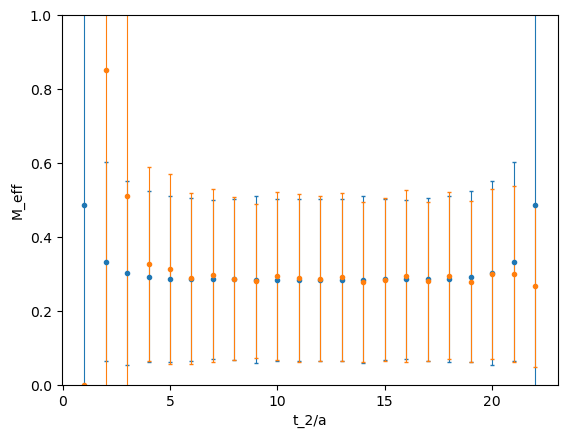

In [2524]:
fig33, ax33 = plt.subplots()
ax33.errorbar(range(1,t_max_sep),R_00D1_avg[1:],yerr=R_00D1_err[1:],marker='.',ls='',elinewidth=0.8,capsize=1.5,label="Ratio 2")
ax33.errorbar(range(1,t_max_sep),M_eff_00D1_avg[1:],yerr=M_eff_00D1_err[1:],marker='.',ls='',elinewidth=0.8,capsize=1.5,label="Ratio 1")
ax33.set_xlabel("t_2/a")
ax33.set_ylabel("M_eff")
ax33.set_ylim(0.0,1)

In [2569]:
R_00D1_jk.shape

(50, 23)

In [2570]:
M_eff_all[0,0].shape

(50, 23)

In [2526]:
fpr_1, fcr_1 = const_fit_ATW(50,R_00D1_jk,6,17)

chi square, dof= 0.023147696259948742 10
p-value= 0.9999999999990098
----------------------------------------


In [2573]:
fpr_1.shape

(50,)

In [2574]:
fit_arr = np.zeros((nOp,nOp,2))

for i in range(nOp):
    for j in range(nOp):
        fp, fc = const_fit_ATW(50, M_eff_all[i,j],6,17)
        fp_avg, fp_err = jack(fp)
        fit_arr[i,j,0] = fp_avg
        fit_arr[i,j,1] = fp_err

chi square, dof= 0.023147696259948742 10
p-value= 0.9999999999990098
----------------------------------------
chi square, dof= 0.02280891998905016 10
p-value= 0.9999999999990801
----------------------------------------
chi square, dof= 0.023221037064640956 10
p-value= 0.999999999998994
----------------------------------------
chi square, dof= 0.025097900684882074 10
p-value= 0.9999999999985175
----------------------------------------
chi square, dof= 0.025556878271605066 10
p-value= 0.9999999999983772
----------------------------------------
chi square, dof= 0.02463611541011818 10
p-value= 0.9999999999986486
----------------------------------------
chi square, dof= 0.02358425121034164 10
p-value= 0.9999999999989131
----------------------------------------
chi square, dof= 0.02337194409219418 10
p-value= 0.999999999998961
----------------------------------------
chi square, dof= 0.025315321530373757 10
p-value= 0.9999999999984522
----------------------------------------
chi square, dof=

In [2575]:
for i in range(nOp):
    for j in range(nOp):
        print(f"<pi0_{i} | O_2pi({j}) | pi0_{i}> = {fit_arr[i,j,0]} +/- {fit_arr[i,j,1]}")

<pi0_0 | O_2pi(0) | pi0_0> = 0.2841565647552106 +/- 0.21457077695231966
<pi0_0 | O_2pi(1) | pi0_0> = 0.002278218063273954 +/- 0.006815385497198907
<pi0_0 | O_2pi(2) | pi0_0> = 0.0018171044617644983 +/- 0.005710312512109754
<pi0_0 | O_2pi(3) | pi0_0> = 0.001457349008386009 +/- 0.0058538474345039455
<pi0_1 | O_2pi(0) | pi0_1> = 0.008309740249126401 +/- 0.03497179677064893
<pi0_1 | O_2pi(1) | pi0_1> = 0.02236189754346391 +/- 0.01659582221018439
<pi0_1 | O_2pi(2) | pi0_1> = 0.0007892850619473413 +/- 0.0019363348392758212
<pi0_1 | O_2pi(3) | pi0_1> = 0.0007427596815022776 +/- 0.001764355544238656
<pi0_2 | O_2pi(0) | pi0_2> = 0.026189874126596367 +/- 0.12347636882456577
<pi0_2 | O_2pi(1) | pi0_2> = 0.0019633796177386718 +/- 0.00572038870011551
<pi0_2 | O_2pi(2) | pi0_2> = 0.007729897087034941 +/- 0.005925024679001932
<pi0_2 | O_2pi(3) | pi0_2> = 0.0011721789387038662 +/- 0.0031567151304735643
<pi0_3 | O_2pi(0) | pi0_3> = 0.10459584254979241 +/- 0.5128186395162371
<pi0_3 | O_2pi(1) | pi0_3> =

In [2527]:
R_fit1, R_fit_err1 = jack(fpr_1[:])
print(f"Delta = 1 <pi0_0 | O_2pi(000) | pi0_0> = {R_fit1} +/- {R_fit_err1}")

Delta = 1 <pi0_0 | O_2pi(000) | pi0_0> = 0.2841565647552106 +/- 0.21457077695231966


## 2x2 GEVP

Here we do a preliminary GEVP using the ground state and first excited state of the I=2 two pion operators. Momentum configurations are (0,0,0) and (0,0,1). From the pion scattering paper we are looking to approach the 2x2 GEVP value listed for different fit ranges. 

In [85]:
nt = 15
nOp = 2
ncf = 10
#we construct our 2x2 correlator arrays
#corr_D0 = np.reshape(corr_arr[:,1:,:,0,0],shape=(2,2,ncf,nt)) #internal 2pi separation Delta=0
#corr_D1 = np.reshape(corr_arr[:,1:,:,1,1],shape=(2,2,ncf,nt))#internal 2pi separation Delta=1

#manually setting matrix elements seems stupid for the 4x4 case
corr_D0_1 = corr_arr[:,1,:,0,0]
corr_D0_2 = corr_arr[:,2,:,0,0]
corr_D0_3 = corr_arr[:,3,:,0,0]
corr_D0_4 = corr_arr[:,4,:,0,0]

D0_corr = np.zeros((nOp, nOp, ncf, nt),dtype=np.complex128)

D0_corr[0,0,:,:] = jackblocks(corr_D0_1,omit=[])
D0_corr[0,1,:,:] = jackblocks(corr_D0_2,omit=[])
D0_corr[1,0,:,:] = jackblocks(corr_D0_3,omit=[])
D0_corr[1,1,:,:] = jackblocks(corr_D0_4,omit=[])

#D0_corr = np.stack((op1_corr,op2_corr),axis=2)
#reshape to (nOp, op_tsep_snk, op_tsep_src, ncf, tsep)
#tbt_corr = np.reshape(tbt_corr, shape=(2,2,2,10,15)) #this could be messing the data up. I don't knoew enough about how the reshape function works.

In [314]:
delta_t = 4

corr_sub_1 = atw_subtract(corr_D0_1,delta_t,ncf,nt)
corr_sub_2 = atw_subtract(corr_D0_2,delta_t,ncf,nt)
corr_sub_3 = atw_subtract(corr_D0_3,delta_t,ncf,nt)
corr_sub_4 = atw_subtract(corr_D0_4,delta_t,ncf,nt)

sub_corr = np.zeros((nOp,nOp,ncf,nt-delta_t),dtype=np.complex128)

sub_corr[0,0,:,:] = jackblocks(corr_sub_1,omit=[])
sub_corr[0,1,:,:] = jackblocks(corr_sub_2,omit=[])
sub_corr[1,0,:,:] = jackblocks(corr_sub_3,omit=[])
sub_corr[1,1,:,:] = jackblocks(corr_sub_4,omit=[])

In [86]:
D0_corr.shape

(2, 2, 10, 15)

In [61]:
corrD0_jk = jackblocks(corr_D0, omit = [])
#corrD1_jk = jackblocks(corr_D1, omit = [])

In [99]:
corr0_avg, corr0_err = jack(D0_corr[0,0,:,:].real)
corr1_avg, corr1_err = jack(D0_corr[0,1,:,:].real)
corr2_avg, corr2_err = jack(D0_corr[1,0,:,:].real)
corr3_avg, corr3_err = jack(D0_corr[1,1,:,:].real)

In [103]:
D0_corr[0,1,0,:]

array([ 1.14329306e-02+2.37402825e-05j,  3.70773286e-04-2.01587056e-06j,
        3.09319324e-04+2.10011082e-06j, -1.81691333e-04-1.75576291e-06j,
       -8.24388750e-05-3.37242096e-06j, -1.18900346e-06+8.82084699e-07j,
       -8.31469260e-05+8.59989481e-07j, -1.08317046e-04+1.44589591e-07j,
       -5.09417220e-05+7.58760449e-07j, -5.57083649e-05-1.38057940e-06j,
       -2.91466286e-05+1.77198683e-06j, -4.22487187e-05-6.01732752e-07j,
       -3.66312736e-05-6.29463226e-07j, -2.23195602e-05+6.86380245e-07j,
       -1.43098253e-05-1.65513794e-08j])

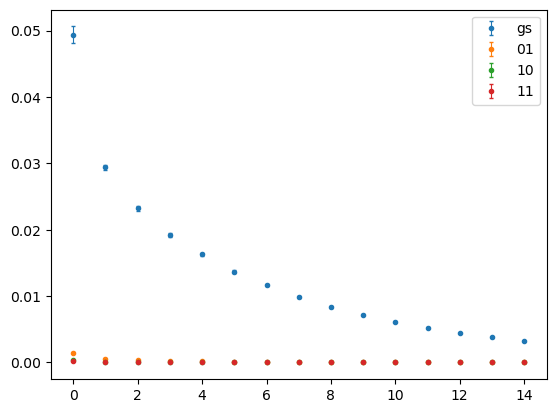

In [571]:
X1 = np.linspace(0,14,15)
fig1, ax1 = plt.subplots()
ax1.errorbar(X1, corr0_avg, yerr=corr0_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="gs")
ax1.errorbar(X1, corr1_avg, yerr=corr1_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="01")
ax1.errorbar(X1, corr2_avg, yerr=corr2_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="10")
ax1.errorbar(X1, corr3_avg, yerr=corr3_err, marker=".", ls = "", elinewidth=0.8, capsize=1.5, label="11")
ax1.set_yscale("log")
ax1.legend()

The data we loaded in is of the shape ($n_{cf}$, $n_{Op}$, $t_{sep}$, $\Delta_1$, $\Delta_2$), where the second index is the number of possible combinations of momentum configurations in the two pion two point function. For the 2x2 GEVP, there are 4 of these, all possible combinations of the (0,0,0) and (0,0,1) momenta, these make up the entries in our 2x2 correlator matrix. $t_{sep}$ is the separation between the source and sink two pion operators. the final two indices is the separation of the one pion operators inside the sink and source two operators. We build a 2x2 correlator matrix for each internal separation - keeping them the same between source and sink, this gives us two 2x2 correlator matrices to do the GEVP on. 

In [105]:
l48I = Ensemble_jks()
l48I.jks = D0_corr
ncf = l48I.jks.shape[2]

In [170]:
minOp = 0
maxOp = 2
tmin = 2
tmax = 15
l48I.e = np.zeros((ncf, nt, maxOp-minOp))
l48I.vec=np.zeros((ncf, nt, maxOp-minOp, maxOp-minOp))

#GEVP
# C(t)V_n(t_0) = lambda(t,t_0)C(t_0)V_n(t_0)
#where in the case below we use a as the correlator data on the lhs, b as the correlator data on the rhs
#meaning t_0 is set to the timeslice before t, that is t_0 = t-1, and t-t_0 = Delta_t = 1 and is a constant
#preferable inequality t_0 > t/2
for cf in range(ncf):
    for t in range(tmin,tmax):
        a = l48I.jks[minOp:maxOp, minOp:maxOp, cf, t] #C(t) for some jackknife block
        b = l48I.jks[minOp:maxOp, minOp:maxOp, cf, t-1] #C(t_0) for some jackknife block
        #np.linalg.cholesky(b) error here if b is not positive definite
        a = 0.5*(a+np.conjugate(np.transpose(a))) #ensure hermiticity
        b = 0.5*(b+np.conjugate(np.transpose(b)))
        l48I.e[cf,t],l48I.vec[cf,t]=eigh(a,b,type=1) # form for eigh: a @ vi = λ * b @ vi

#evals need to be sorted into descending order? 

/tmp/ipykernel_1480523/3567376501.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  l48I.e[cf,t],l48I.vec[cf,t]=eigh(a,b,type=1) # form for eigh: a @ vi = λ * b @ vi


This is the basic GEVP procedure given a NxN correlator matrix. There are two improvements that can be made, the first is an improvement of the long distance part of the GEVP, using a recursive apprach, using the eigenvalues and vectors on the timeslice previous to calculate the next timeslice. The second is rebasing, which allows for a more precise determination of the N' lowest states. 

In [149]:
np.log(l48I.e[1,13]) - np.log(l48I.e[1,14])

array([ 0.10118283, -0.01305786])

In [147]:
l48I.e[0,0]

array([0., 0.])

In [216]:
avg,cov=covariance(-np.log(l48I.e[:,tmin[l]:tmax[l],l]),shrinkage=0.1)
cov

array([[ 5.37746328e-04, -5.32779391e-04,  8.82027412e-05,
         1.24993952e-04, -1.98439771e-04,  1.96288602e-04,
        -1.49306438e-04,  2.73121953e-04,  1.48715650e-04,
        -2.40094275e-04],
       [-5.32779391e-04,  9.33745466e-04, -1.06346618e-04,
        -2.49030320e-04,  2.80524020e-04, -2.30897494e-04,
         2.02031338e-04, -3.46225578e-04, -2.68748439e-04,
         3.21803918e-04],
       [ 8.82027412e-05, -1.06346618e-04,  1.36317282e-04,
        -4.15899431e-05,  3.04859934e-05, -4.94893639e-05,
        -5.76751943e-05,  1.25457180e-04,  8.60506802e-05,
        -9.92426564e-05],
       [ 1.24993952e-04, -2.49030320e-04, -4.15899431e-05,
         4.20691099e-04, -2.60866061e-04,  1.65034763e-04,
        -1.27341552e-04,  8.93837805e-05,  7.73291186e-05,
        -7.54181488e-05],
       [-1.98439771e-04,  2.80524020e-04,  3.04859934e-05,
        -2.60866061e-04,  3.14066075e-04, -1.68337492e-04,
         5.83692192e-05, -1.24149155e-04, -5.50464958e-05,
         1.

In [268]:
#ground state fit
npar = 1
fitpars_gs=np.zeros((ncf, npar))
fitcov_gs=np.zeros((ncf, npar, npar))
tmax=[15]*maxOp
tmin=[5]*maxOp

csq = np.zeros((maxOp,ncf))
guess=([0.25])

#operator label. l=1 is ground state (for a larger GEVP this will be l=-1, since the operators are backward
l=1

avg,cov=covariance(-np.log(l48I.e[:,tmin[l]:tmax[l],l]),shrinkage=0.1)
dof=tmax[l]-tmin[l]-npar
t=np.arange(tmin[l],tmax[l])
for jk in range(ncf):
    val = -np.log(l48I.e[jk,tmin[l]:tmax[l],l])
    popt,pcov=curve_fit(gs_const,t,val,sigma=cov,p0=guess,absolute_sigma=True)

    fitpars_gs[jk] = popt
    fitcov_gs[jk] = pcov
    theory = gs_const(t,*popt)
    r=avg-theory
    csq[l][jk] = r.T @ inv(cov) @ r
cs = jack(csq[l])
F = fdist(dof,ncf-dof)
p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
print("n, chisq, dof=",l,cs,dof)
print('p-value=', p_value)

n, chisq, dof= 1 (np.float64(37.90526340842485), np.float64(0.07999474125319267)) 9
p-value= 0.8221889757707541


In [241]:
jack(fitpars[1,:,0])

(np.float64(0.8181163557726672), np.float64(0.005567190613803531))

In [269]:
#excited state fit
npar=3
fitpars_ex=np.zeros((maxOp-1,ncf,npar))
fitcov_ex=np.zeros((maxOp-1,ncf,npar,npar))
tmax=[15]*maxOp
tmin=[5]*maxOp
#tmax[4]=13
# jackknife the fit
csq=np.zeros((maxOp,ncf))
guess = ([0.25,1.,1])
l=0
#same cov mat for each block ("frozen")
avg,cov=covariance(-np.log(l48I.e[:,tmin[l]:tmax[l],l]))
dof=tmax[l]-tmin[l]-npar
t=np.arange(tmin[l],tmax[l])
for jk in range(ncf):
    val=-np.log(l48I.e[jk,tmin[l]:tmax[l],l])
    popt,pcov=curve_fit(const_plus_exp,t,val,sigma=cov, 
                        p0=guess, absolute_sigma=True)
    fitpars_ex[l][jk] = popt
    fitcov_ex[l][jk] = pcov
    theory = const_plus_exp(t, *popt)
    r = avg - theory
    csq[l][jk] = r.T @ inv(cov) @ r
cs=jack(csq[l])
F = fdist(dof,ncf-dof)
p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
print('n, chi square, dof=',l,cs,dof)
print('p-value=',p_value)

n, chi square, dof= 0 (np.float64(11.966215956669581), np.float64(0.2732933693778097)) 7
p-value= 0.7570980745641057


In [261]:
npar=3
fitpars=np.zeros((maxOp,ncf,npar))
fitcov=np.zeros((maxOp,ncf,npar,npar))
tmax=[15]*maxOp
tmin=[5]*maxOp
#tmax[4]=13
# jackknife the fit
csq=np.zeros((maxOp,ncf))
guess = ([0.25,1.,1])
for l in range(maxOp):
    #same cov mat for each block ("frozen")
    avg,cov=covariance(-np.log(l48I.e[:,tmin[l]:tmax[l],l]))
    dof=tmax[l]-tmin[l]-npar
    t=np.arange(tmin[l],tmax[l])
    for jk in range(ncf):
        val=-np.log(l48I.e[jk,tmin[l]:tmax[l],l])
        popt,pcov=curve_fit(const_plus_exp,t,val,sigma=cov, 
                            p0=guess, absolute_sigma=True)
        fitpars[l][jk] = popt
        fitcov[l][jk] = pcov
        theory = const_plus_exp(t, *popt)
        r = avg - theory
        csq[l][jk] = r.T @ inv(cov) @ r
    cs=jack(csq[l])
    F = fdist(dof,ncf-dof)
    p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
    print('n, chi square, dof=',l,cs,dof)
    print('p-value=',p_value)

n, chi square, dof= 0 (np.float64(11.966215956669581), np.float64(0.2732933693778097)) 7
p-value= 0.7570980745641057
n, chi square, dof= 1 (np.float64(37.905263408381884), np.float64(0.07999475817282035)) 7
p-value= 0.3383450396437615


/tmp/ipykernel_1480523/1878569069.py:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcov=curve_fit(const_plus_exp,t,val,sigma=cov,


(12,) (12,) (12,)
Energy= 0 0.27801532015177144 0.001065297877724768
(12,) (12,) (12,)
Energy= 1 0.4610234984518607 0.05092325702092073
Amp= 0.24515229601205837 0.13376144912698215
DeltaE= 0.16002110543805936 0.154452246240699


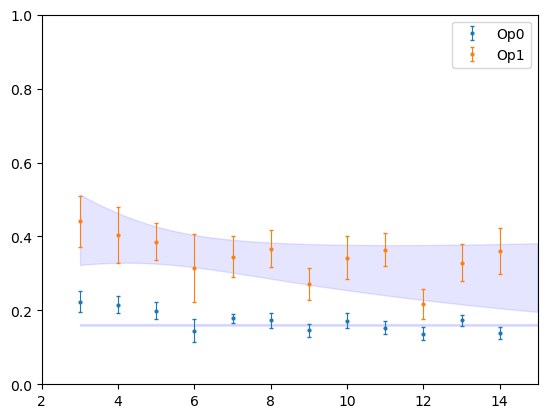

In [288]:
#plot
avg=np.average(l48I.e,axis=0)
# data range
tmin=3
tmax=15
a_inv = 1.73
t=np.arange(tmin,tmax)
# fit range
ftmin=3
ftmax=15
tc=np.zeros(int((ftmax-ftmin)/0.01))
cmat=np.zeros((3,3))
for i in range(int((ftmax-ftmin)/0.01)):
    tc[i]=ftmin+i*0.01

#ground state fit band

v=np.average(fitpars_gs,axis=0)
cmat=np.average(fitcov_gs,axis=0)
val=gs_const(tc,*v)
err=np.sqrt(cmat[0][0])
vp = val+err
vm = val-err
plt.fill_between(tc,vp,vm,color='blue', alpha=0.1)

#ground state fit
v,err=jack(-np.log(l48I.e[:,tmin:tmax,1]))
print(t.shape,v.shape,err.shape)
plt.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
v,err=jack(fitpars_gs[:,0])
print('Energy=',l,v*a_inv,err)
#v,err=jack(fitpars_gs[:,1])
#print('Amp=',v,err)
#v,err=jack(fitpars_gs[:,2])
#print('DeltaE=',v,err)

#excited state fit bands
for l in range(maxOp-1):
    v=np.average(fitpars_ex[l],axis=0)
    cmat=np.average(fitcov_ex[l],axis=0)
    val=const_plus_exp(tc,*v)
    err=err_const_plus_exp(tc,v,cmat)
    vp = val+err
    vm = val-err
    plt.fill_between(tc,vp,vm,color='blue', alpha=0.1)

#excited state fit
for l in range(maxOp-1):
    #E_eff = np.log(l48I.e[:,(tmin-1):(tmax-1),l]) - np.log(l48I.e[:,(tmin):(tmax),l])
    #v,err = jack(E_eff)
    v,err=jack(-np.log(l48I.e[:,tmin:tmax,l]))
    print(t.shape,v.shape,err.shape)
    plt.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l+1))
    v,err=jack(fitpars_ex[l,:,0])
    print('Energy=',l+1,v*a_inv,err)
    v,err=jack(fitpars_ex[l,:,1])
    print('Amp=',v,err)
    v,err=jack(fitpars_ex[l,:,2])
    print('DeltaE=',v,err)
plt.ylim(0.0,1.0)
plt.xlim(2,15)
plt.legend()

(12,) (12,) (12,)
Energy= 0 0.4610234984518607 0.05092325702092073
Amp= 0.24515229601205837 0.13376144912698215
DeltaE= 0.16002110543805936 0.154452246240699
(12,) (12,) (12,)
Energy= 1 0.27801532021989306 0.0010652978768733504
Amp= 8.395997606079987 2.968436835612455
DeltaE= 8.322083921781292 2.5096502879399036


/tmp/ipykernel_1480523/383003043.py:37: RuntimeWarning: invalid value encountered in add
  errsq += 2*c[0][2]*(-t)*p[1]*fact


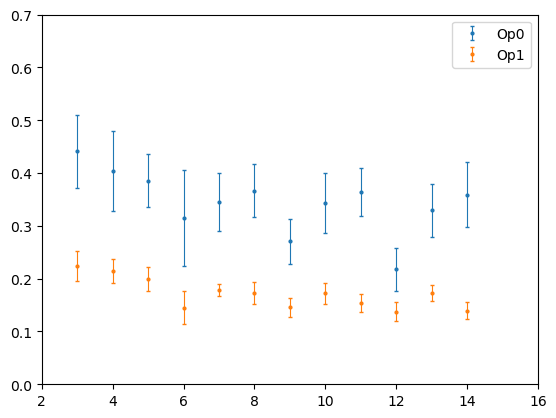

In [263]:
#plot
avg=np.average(l48I.e,axis=0)
# data range
tmin=3
tmax=15
a_inv = 1.73
t=np.arange(tmin,tmax)
# fit range
ftmin=5
ftmax=10
tc=np.zeros(int((ftmax-ftmin)/0.01))
cmat=np.zeros((3,3))
for i in range(int((ftmax-ftmin)/0.01)):
    tc[i]=ftmin+i*0.01
for l in range(maxOp):
    #creating a fit band based on the model we fit to 
    v=np.average(fitpars[l],axis=0)
    cmat=np.average(fitcov[l],axis=0)
    val=linear_fit(tc,*v)
    err=err_const_plus_exp(tc,v,cmat)
    vp = val+err
    vm = val-err
    plt.fill_between(tc,vp,vm,color='blue', alpha=0.1)
for l in range(maxOp):
    #E_eff = np.log(l48I.e[:,(tmin-1):(tmax-1),l]) - np.log(l48I.e[:,(tmin):(tmax),l])
    #v,err = jack(E_eff)
    v,err=jack(-np.log(l48I.e[:,tmin:tmax,l]))
    print(t.shape,v.shape,err.shape)
    plt.errorbar(t,v,err,marker='o',linestyle='',elinewidth=0.8,markersize=2,capsize=1.5,label='Op'+str(l))
    v,err=jack(fitpars[l,:,0])
    print('Energy=',l,v*a_inv,err)
    v,err=jack(fitpars[l,:,1])
    print('Amp=',v,err)
    v,err=jack(fitpars[l,:,2])
    print('DeltaE=',v,err)
plt.ylim(0.0,0.7)
plt.xlim(2,16)
plt.legend()
#plt.savefig('gevp energies.png')

In [159]:
fitpars[0,:,0]*a_inv

array([0.41739973, 0.49169697, 0.43219893, 0.48674369, 0.40862554,
       0.47461117, 0.45810482, 0.4844111 , 0.48846792, 0.46797512])

In [169]:
-np.log(l48I.e[1,tmin:tmax,0])*a_inv

array([0.67199208, 0.55062925, 0.57658633, 0.63777335, 0.4874094 ,
       0.57928498, 0.64126137, 0.41008685, 0.50866438, 0.68371068])

In [299]:
E = []
a_inv = 1.73
for t in range(tmin,tmax-1):
    E.append(-np.log(l48I.e[1,t,0])*a_inv)

In [300]:
E

[np.float64(0.8371393067831614),
 np.float64(0.6376012951739203),
 np.float64(0.6719920827337049),
 np.float64(0.550629252247171),
 np.float64(0.5765863271988245),
 np.float64(0.6377733476893427),
 np.float64(0.4874094017633015),
 np.float64(0.5792849805606063),
 np.float64(0.641261370368251),
 np.float64(0.4100868485204047),
 np.float64(0.508664375730251)]

### Around the world subtraction

The around the world subtraction subtracts the leading thermal effects by defining a subtracted correlator
$$
C^{I,I_z}_{ij,sub}(t) = C^{I,I_z}_{ij}(t) - C^{I,I_z}_{ij}(t+\delta_t)
$$

In [315]:
delta_t = 4

corr_sub_1 = atw_subtract(corr_D0_1,delta_t,ncf,nt) #these corr_D0 objects are the full unsubtracted correlator. 
corr_sub_2 = atw_subtract(corr_D0_2,delta_t,ncf,nt) #we do the subtraction element by element 
corr_sub_3 = atw_subtract(corr_D0_3,delta_t,ncf,nt)
corr_sub_4 = atw_subtract(corr_D0_4,delta_t,ncf,nt)

sub_corr = np.zeros((nOp,nOp,ncf,nt-delta_t),dtype=np.complex128)

sub_corr[0,0,:,:] = jackblocks(corr_sub_1,omit=[])
sub_corr[0,1,:,:] = jackblocks(corr_sub_2,omit=[])
sub_corr[1,0,:,:] = jackblocks(corr_sub_3,omit=[])
sub_corr[1,1,:,:] = jackblocks(corr_sub_4,omit=[])

In [318]:
l48I_sub = Ensemble_jks()
l48I_sub.jks = sub_corr

In [319]:
minOp = 0
maxOp = 2
tmin = 2
tmax = 15

GEVP(l48I_sub,minOp,maxOp,tmin,tmax)

/tmp/ipykernel_1480523/490392612.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  ens_params.e[cf,t],ens_params.vec[cf,t]=eigh(a,b,type=1) # form for eigh: a @ vi = λ * b @ vi


In [403]:
#function for a ground state fit. inputs are the fitting function, the data struct. 
def gs_fit(fit_func, ens_params, op_label):

    npar = 1
    fitpars_gs=np.zeros((ncf, npar))
    fitcov_gs=np.zeros((ncf, npar, npar))
    tmax=[15]*maxOp
    tmin=[5]*maxOp
    
    csq = np.zeros((maxOp,ncf))
    guess=([0.25])

    l = op_label
    
    avg,cov=covariance(-np.log(ens_params.e[:,tmin[l]:tmax[l],l]),shrinkage=0.1)
    dof=tmax[l]-tmin[l]-npar
    t=np.arange(tmin[l],tmax[l])
    for jk in range(ncf):
        val = -np.log(ens_params.e[jk,tmin[l]:tmax[l],l])
        popt,pcov=curve_fit(fit_func,t,val,sigma=cov,p0=guess,absolute_sigma=True)
    
        fitpars[jk] = popt
        fitcov[jk] = pcov
        theory = gs_const(t,*popt)
        r=avg-theory
        csq[l][jk] = r.T @ inv(cov) @ r
    cs = jack(csq[l])
    F = fdist(dof,ncf-dof)
    p_value = 1 - F.cdf(cs[0]/dof/(ncf-1)*(ncf-dof))
    print("n, chisq, dof=",l,cs,dof)
    print('p-value=', p_value)

    return fitpars, fitcov

In [752]:
l48ID1_list[0].e[10,10]

array([0.65055895, 0.68498056, 0.84306885, 1.21881046])